<a href="https://colab.research.google.com/github/patternproject/r.sb.pos.1/blob/main/POS_A3_v13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read Me
##Analysis of Survey Data for POS
##Exploratory Analysis
##Using R

## History
A2-v1 : Using "Without POS Survey" as input (from earlier working in Python)

A2-v2 : Going back to the original file (SurveyData20201003 - A2) to have everything in R

A2-v3 : Completing the Data Cleaning up. Checking unique values of various variables to see if there are any issues to be fixed there

A2-v4 : Data Cleanup completed. CSV written for subsequent analysis 'Without_POS_CleanData.csv'

A3-v1 : Getting into Exploratory Analysis based on CSV created in A2-v4

A3-v2 : WIP

A3-v3 : WIP

A3-v4 : First Iteration of Analysis Completed

A3-v5 : Creating Graphs for Presentation (Moving to Janitor / tabyl) to create pivots

A3-v6 : WIP

A3-v7 : WIP

A3-v8 : WIP

A3-v9 : WIP

A3-v10 : WIP

A3-v11 : WIP

A3-v12 : WIP

A3-v13 : WIP

In [164]:
# library
library(ggplot2)
library(tidyverse)
#install.packages("readxl")
library(readxl)

In [165]:
#install.packages("janitor")
library(janitor)

In [166]:
library(scales)

In [167]:
# reading in input File
df_master = read_csv('/content/Without_POS_CleanData.csv')

Parsed with column specification:
cols(
  .default = col_character(),
  EMP_CODE = col_double()
)

See spec(...) for full column specifications.



In [168]:
# printing DF
print(as_tibble(df_master))

# A tibble: 317 x 20
   EMP_CODE ORG_NAME ORG_CITY EMP_PER_OUTLET ORG_TYPE EXPANSION RECONCILIATION
      <dbl> <chr>    <chr>    <chr>          <chr>    <chr>     <chr>         
 1    33409 Al syed… Islamab… Less than 5    Single … Yes       Yes           
 2    36750 Sohaib … Islamab… Less than 5    Single … Yes       Yes           
 3    34729 Inam co… Rawalpi… Less than 5    Single … No        No            
 4    33409 Reco tr… Islamab… Less than 5    Multipl… Yes       Yes           
 5    33409 Archee … Islamab… Less than 5    Single … Yes       Yes           
 6    36750 Zaki Ge… Rawalpi… Less than 5    Single … Yes       Yes           
 7    35918 Xyz      Karachi  Less than 5    Single … Yes       Yes           
 8    36750 Haseeb … Islamab… Less than 5    Single … Yes       Yes           
 9    36731 Eithsha… islamab… Less than 5    Single … Yes       Yes           
10    36585 adeel s… Rawalpi… Less than 5    Single … Yes       No            
# … with 307 more rows, and 13 

In [169]:
## inspect the data
str(df_master)

tibble [317 × 20] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ EMP_CODE             : num [1:317] 33409 36750 34729 33409 33409 ...
 $ ORG_NAME             : chr [1:317] "Al syed medical store" "Sohaib Computer" "Inam cosmetic" "Reco tradors" ...
 $ ORG_CITY             : chr [1:317] "Islamabad" "Islamabad" "Rawalpindi" "Islamabad" ...
 $ EMP_PER_OUTLET       : chr [1:317] "Less than 5" "Less than 5" "Less than 5" "Less than 5" ...
 $ ORG_TYPE             : chr [1:317] "Single Outlet" "Single Outlet" "Single Outlet" "Multiple outlets" ...
 $ EXPANSION            : chr [1:317] "Yes" "Yes" "No" "Yes" ...
 $ RECONCILIATION       : chr [1:317] "Yes" "Yes" "No" "Yes" ...
 $ WHY_NO_POS           : chr [1:317] "I am happy with how my business is managed presently" "Don’t want to spend money, I am happy with how my business is managed presently, Tax purposes" "I am happy with how my business is managed presently" "Tax purposes" ...
 $ LANGUAGE_PREF        : chr [1:317] "Both, English & Urdu" "Bo

In [170]:
df_1 = df_master

df_1 hereon

In [171]:
df_1 %>% glimpse()

Rows: 317
Columns: 20
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 33409, 36750, 35918…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Yearly )",…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "No", "Yes", "No", "Yes", "No…
$ INTERNET_PROVIDER     <chr> 

In [172]:
colnames(df_1)

[1] "EMP_CODE"              "ORG_NAME"              "ORG_CITY"             
 [4] "EMP_PER_OUTLET"        "ORG_TYPE"              "EXPANSION"            
 [7] "RECONCILIATION"        "WHY_NO_POS"            "LANGUAGE_PREF"        
[10] "PAYMENT_PREF"          "PAYMENT_AMOUNT"        "INTERNET_ACCESS"      
[13] "INTERNET_PROVIDER"     "INTERNET_DISRUPTION"   "DEPLOYMENT_PREF"      
[16] "BUSINESS_IMPROVEMENT"  "STORE_CUST_DATA"       "OFFER_DISCOUNTS"      
[19] "COMPETITIVE_ADVANTAGE" "ORG_CITY_CLEAN"

Using "tabyl" from Janitor to make freq table

## Graph 1

In [173]:
t1 <- df_1 %>%
  tabyl(ORG_CITY_CLEAN) %>%
  adorn_pct_formatting(affix_sign = FALSE) %>% # if you do not want percentage sign, affix_sign = FALSE
  mutate(PERCENTAGE = as.numeric(percent),
         LABEL = paste(round(PERCENTAGE,2), "%", sep=""),
         C_LABEL = paste("(",n,")",sep="")) %>%
  arrange(desc(PERCENTAGE)) %>% # descending %>%
  rename(COUNT = n) # renaming column 
  
t1

ORG_CITY_CLEAN,COUNT,percent,PERCENTAGE,LABEL,C_LABEL
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
RWP,118,37.2,37.2,37.2%,(118)
ISL,101,31.9,31.9,31.9%,(101)
KHI,97,30.6,30.6,30.6%,(97)
MNS,1,0.3,0.3,0.3%,(1)


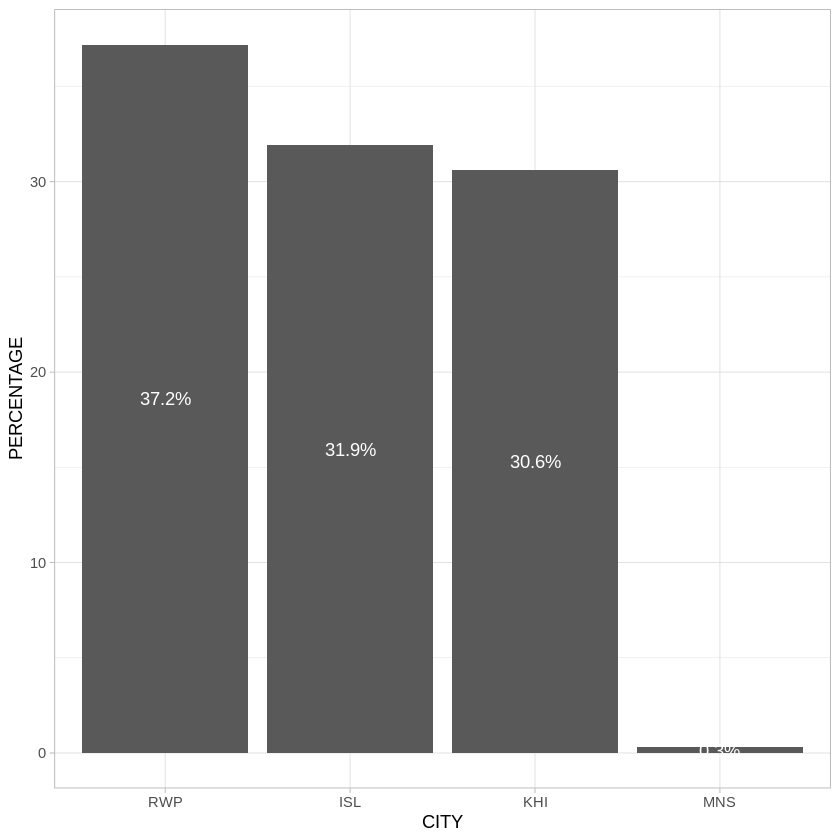

In [174]:
positions <- c("RWP","ISL", "KHI", "MNS")

g <- ggplot(t1, aes(x = ORG_CITY_CLEAN,y=PERCENTAGE)) + scale_x_discrete(limits = positions)
# Number of cases in each city:
g <- g + geom_col()

#p.labs <- g + labs(x = "CITY", y = "COUNT")
p.labs <- g + labs(x = "CITY")
p.labs <- p.labs + geom_text(aes(label=LABEL),position=position_stack(0.5),colour='white')
#p.labs <- p.labs + geom_text(aes(label=C_LABEL),position=position_stack(0.4),colour='white')

p.labs <- p.labs + theme_light()
p.labs

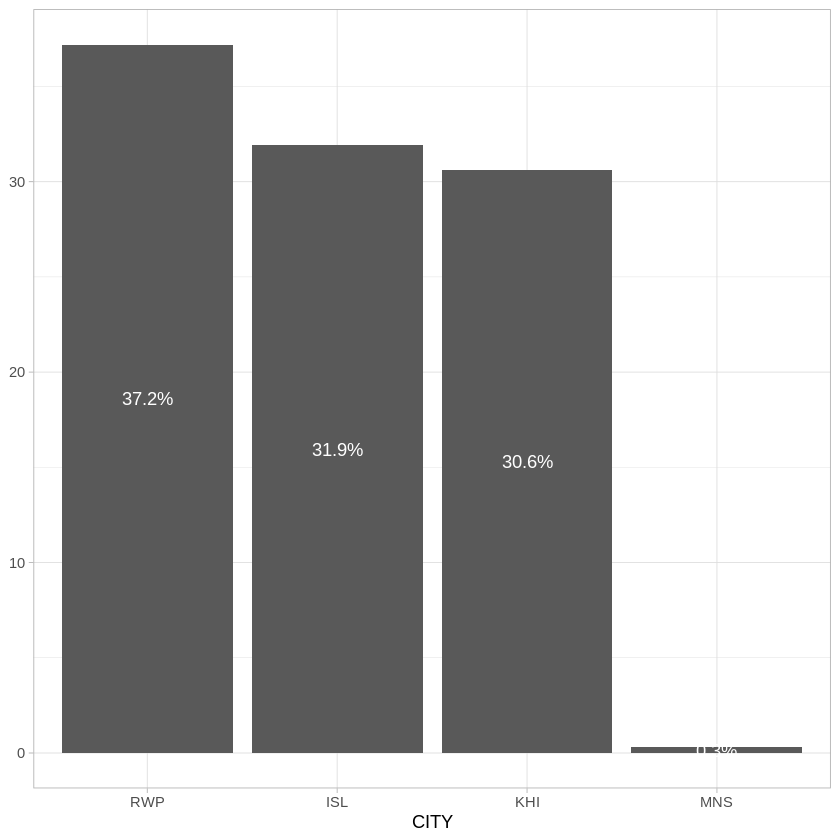

In [175]:
 p.labs + theme(axis.title.y = element_blank())

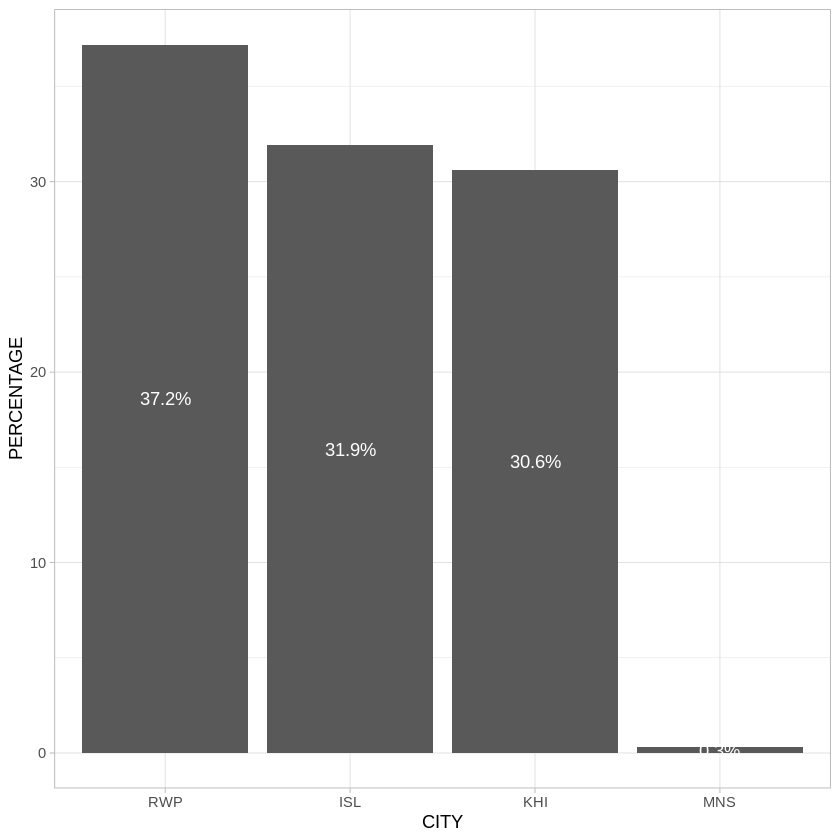

In [176]:
p.labs <- p.labs + scale_fill_brewer(palette = "Set2") 
p.labs

## Graph 2

In [177]:
# recode EMP_PER_OUTLET

#df_2 = df_1 %>%
#  mutate(ORG_SIZE = recode(EMP_PER_OUTLET, "Less than 5" = "<5",
#  "More than 5 but less than 10" = "5To10",
#  "More than 10" = "10+"))


df_2 = df_1 %>%
  mutate(ORG_SIZE = recode(EMP_PER_OUTLET, "Less than 5" = "SMALL",
  "More than 5 but less than 10" = "MEDIUM",
  "More than 10" = "LARGE"))

In [178]:
distinct(df_1, EMP_PER_OUTLET)

EMP_PER_OUTLET
<chr>
Less than 5
More than 5 but less than 10
More than 10


In [179]:
distinct(df_2, ORG_SIZE)

ORG_SIZE
<chr>
SMALL
MEDIUM
LARGE


In [180]:
t2 <- df_2 %>%
  tabyl(ORG_SIZE) %>%
  adorn_pct_formatting(affix_sign = FALSE) %>% # if you do not want percentage sign, affix_sign = FALSE
  mutate(PERCENTAGE = as.numeric(percent),
         LABEL = paste(round(PERCENTAGE,2), "%", sep=""),
         C_LABEL = paste("(",n,")",sep="")) %>%
  arrange(desc(PERCENTAGE)) %>% # descending %>%
  rename(COUNT = n) # renaming column 

t2

ORG_SIZE,COUNT,percent,PERCENTAGE,LABEL,C_LABEL
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
SMALL,274,86.4,86.4,86.4%,(274)
MEDIUM,27,8.5,8.5,8.5%,(27)
LARGE,16,5.0,5.0,5%,(16)


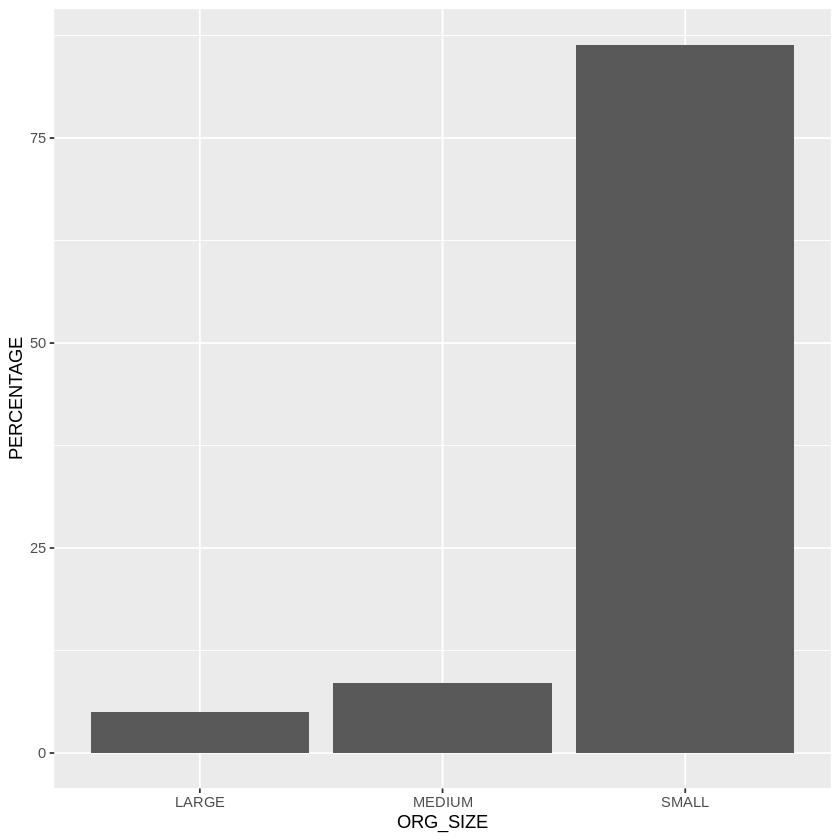

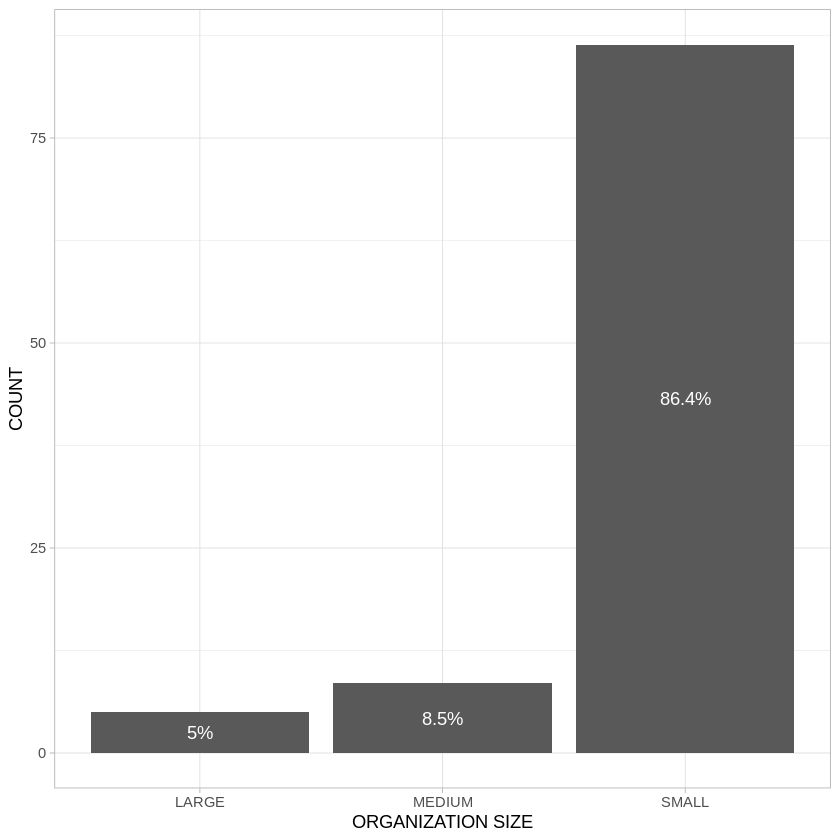

In [181]:
#positions <- c("Less than 5"
#,"More than 5 but less than 10"
#,"More than 10")

positions <- c("Small"
,"Medium"
,"Large")

g2 <- ggplot(t2, aes(x = ORG_SIZE,y=PERCENTAGE)) #+ scale_x_discrete(limits = positions)
# Number of cases in each city:
g2 <- g2 + geom_col()
g2

p.labs2 <- g2 + labs(x = "ORGANIZATION SIZE", y = "COUNT")
#p.labs2 <- g2 + labs(x = "EMPLOYEES PER OUTLET", y = "COUNT")
p.labs2 <- p.labs2 + geom_text(aes(label=LABEL),position=position_stack(0.5),colour='white')
#p.labs2 <- p.labs2 + geom_text(aes(label=C_LABEL),position=position_stack(0.2),colour='white')

p.labs2 <- p.labs2 + theme_light()
p.labs2

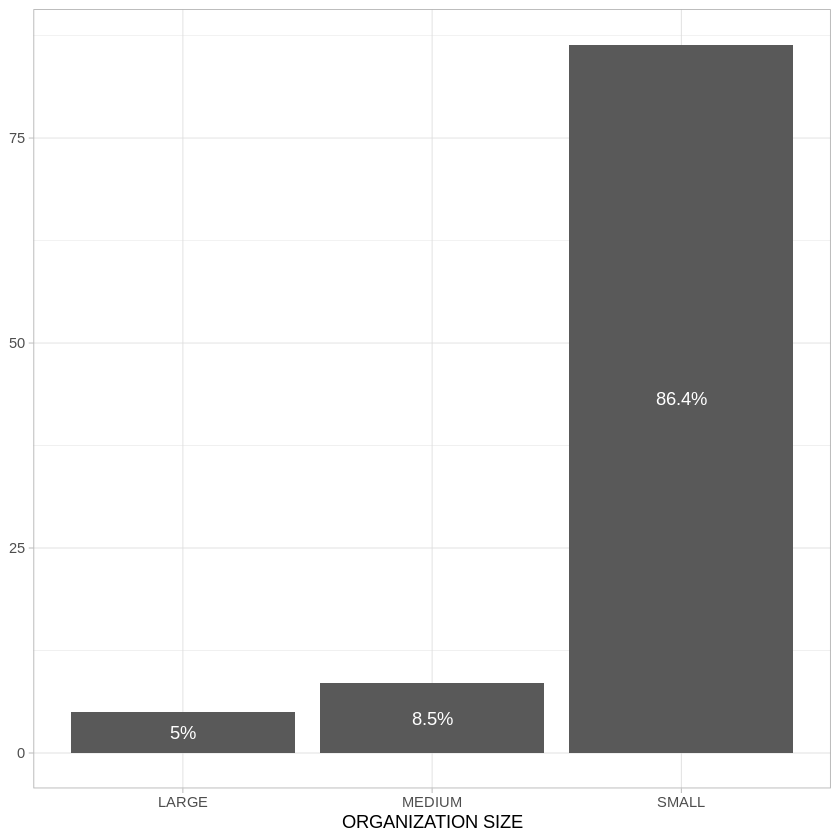

In [182]:
p.labs2 + theme(axis.title.y = element_blank())

In [183]:
df_2$ORG_SIZE <- factor(df_2$ORG_SIZE, levels = c("SMALL", "MEDIUM", "LARGE"))
t2$ORG_SIZE <- factor(t2$ORG_SIZE, levels = c("SMALL", "MEDIUM", "LARGE"))

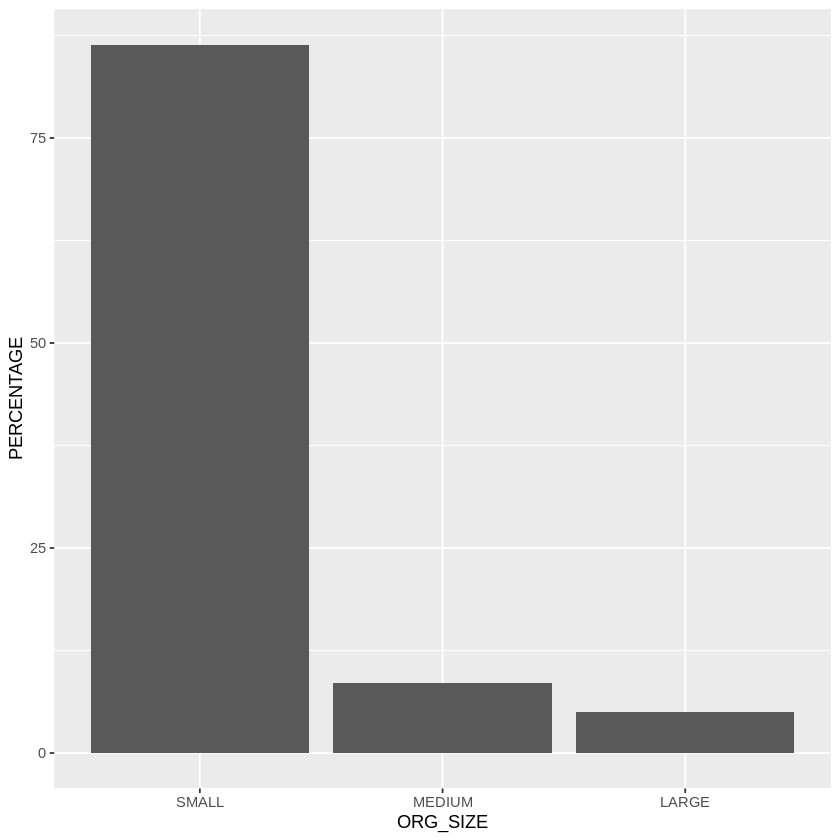

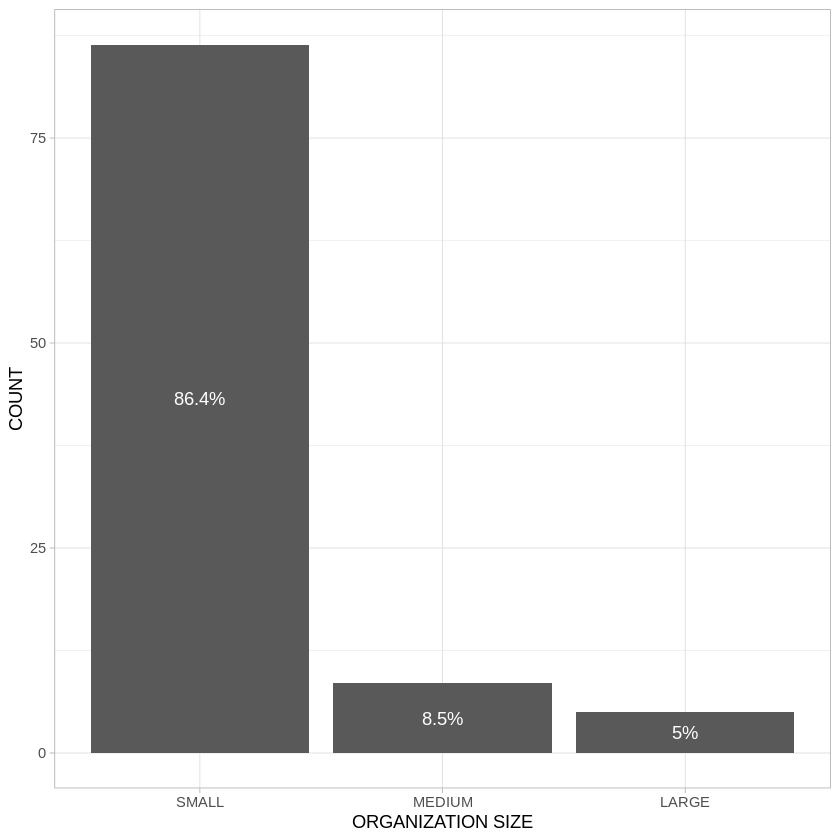

In [184]:
g2 <- ggplot(t2, aes(x = ORG_SIZE,y=PERCENTAGE)) #+ scale_x_discrete(limits = positions)
# Number of cases in each city:
g2 <- g2 + geom_col()
g2

p.labs2 <- g2 + labs(x = "ORGANIZATION SIZE", y = "COUNT")
#p.labs2 <- g2 + labs(x = "EMPLOYEES PER OUTLET", y = "COUNT")
p.labs2 <- p.labs2 + geom_text(aes(label=LABEL),position=position_stack(0.5),colour='white')
#p.labs2 <- p.labs2 + geom_text(aes(label=C_LABEL),position=position_stack(0.2),colour='white')

p.labs2 <- p.labs2 + theme_light()
p.labs2

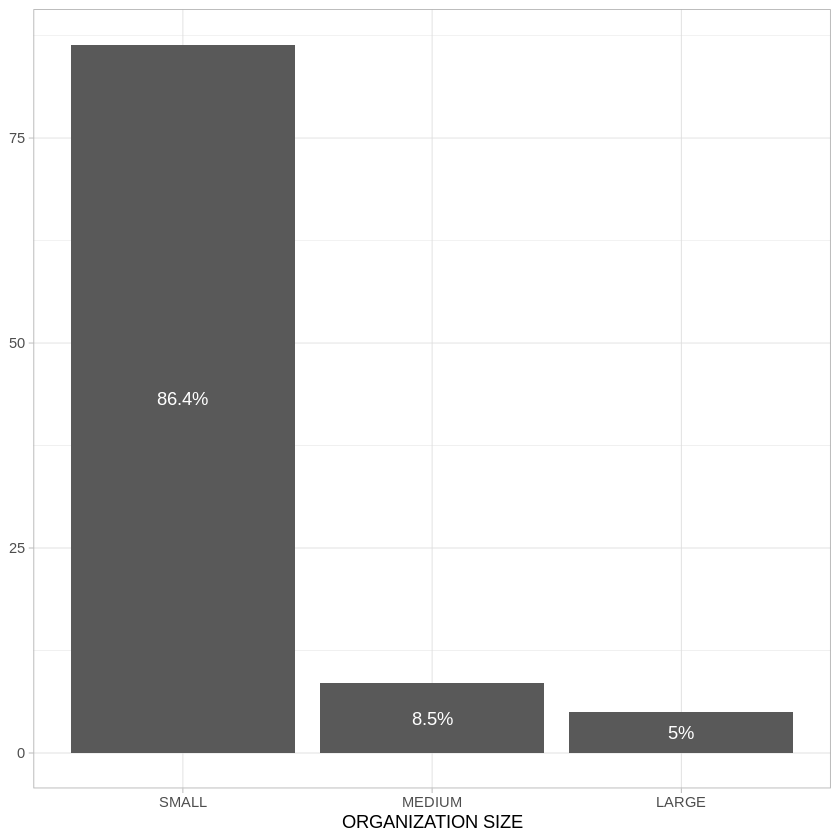

In [185]:
p.labs2 + theme(axis.title.y = element_blank())

## Graph 3

df_2 hereon

In [186]:
distinct(df_2,ORG_CITY_CLEAN)

ORG_CITY_CLEAN
<chr>
ISL
RWP
KHI
MNS


In [187]:
# recode ORG_CITY_CLEAN (Merge ISL and RWP)

df_2 = df_2 %>%
  mutate(ORG_REGION = recode(ORG_CITY_CLEAN, "ISL" = "NORTH",
  "RWP" = "NORTH",
  "KHI" = "SOUTH"))

In [188]:
distinct(df_2, ORG_TYPE)

ORG_TYPE
<chr>
Single Outlet
Multiple outlets
Chain


In [189]:
t3 <- df_2 %>%
  tabyl(ORG_TYPE) %>%
  adorn_pct_formatting(affix_sign = FALSE) %>% # if you do not want percentage sign, affix_sign = FALSE
  mutate(PERCENTAGE = as.numeric(percent),
         LABEL = paste(round(PERCENTAGE,2), "%", sep=""),
         C_LABEL = paste("(",n,")",sep="")) %>%
  arrange(desc(PERCENTAGE)) %>% # descending %>%
  rename(COUNT = n) # renaming column 

t3

ORG_TYPE,COUNT,percent,PERCENTAGE,LABEL,C_LABEL
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
Single Outlet,285,89.9,89.9,89.9%,(285)
Multiple outlets,27,8.5,8.5,8.5%,(27)
Chain,5,1.6,1.6,1.6%,(5)


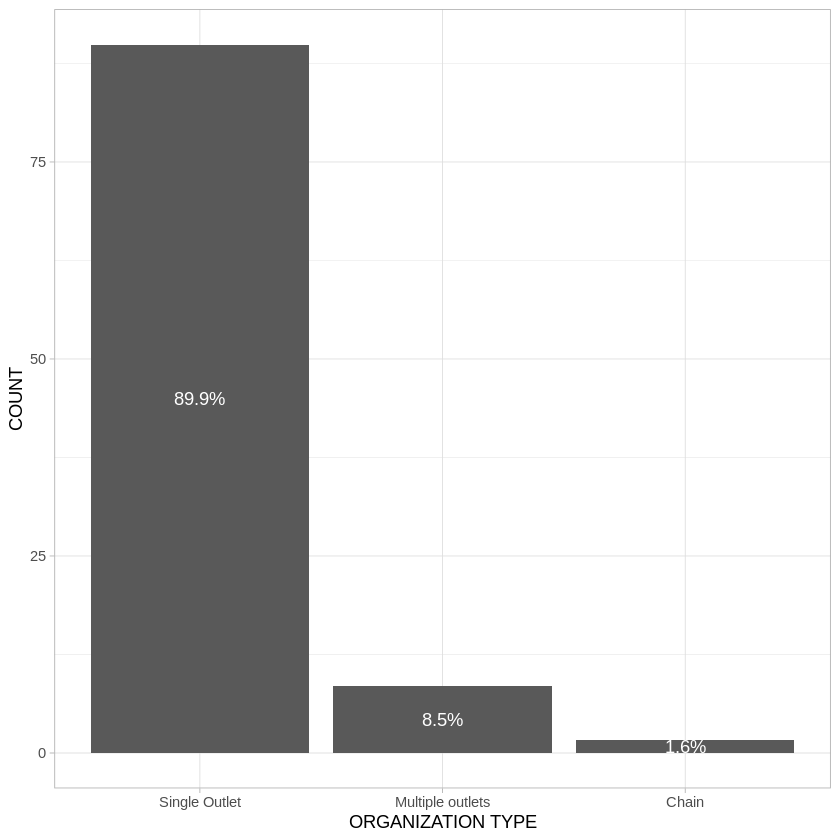

In [190]:
positions <- c("Single Outlet"
,"Multiple outlets"
,"Chain")

g3 <- ggplot(t3, aes(x = ORG_TYPE,y=PERCENTAGE)) + scale_x_discrete(limits = positions)
# Number of cases in each city:
g3 <- g3 + geom_col()

p.labs3 <- g3 + labs(x = "ORGANIZATION TYPE", y = "COUNT")
p.labs3 <- p.labs3 + geom_text(aes(label=LABEL),position=position_stack(0.5),colour='white')
#p.labs3 <- p.labs3 + geom_text(aes(label=C_LABEL),position=position_stack(0.2),colour='white')

p.labs3 <- p.labs3 + theme_light()
p.labs3

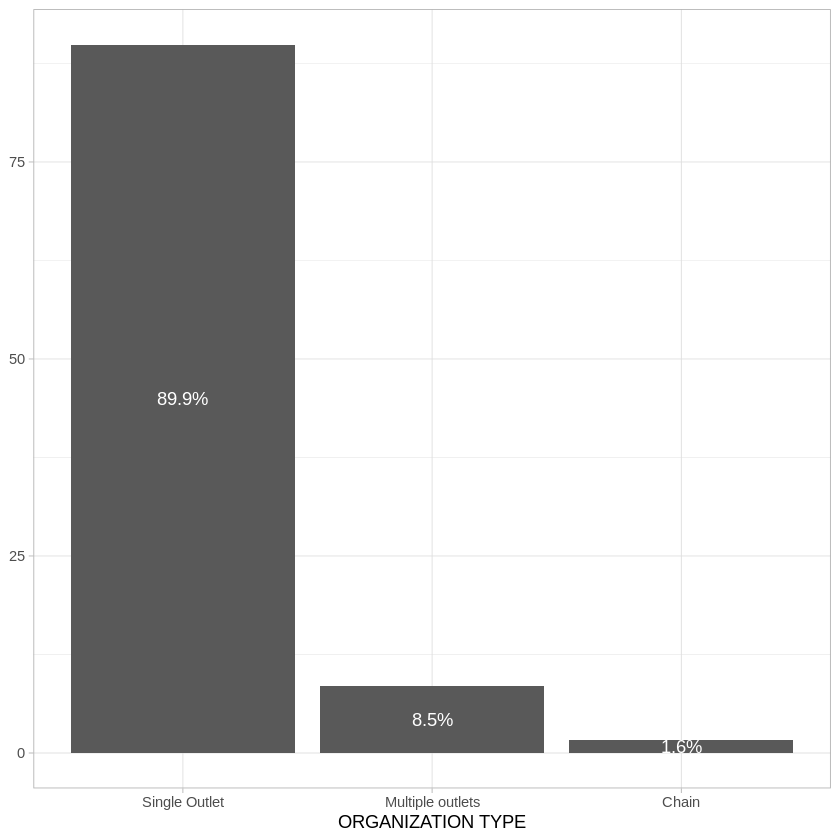

In [191]:
p.labs3 + theme(axis.title.y = element_blank())

In [192]:
nrow(df_2)

[1] 317

In [193]:
glimpse(df_2)

Rows: 317
Columns: 22
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 33409, 36750, 35918…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Yearly )",…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "No", "Yes", "No", "Yes", "No…
$ INTERNET_PROVIDER     <chr> 

In [194]:
# remove single entry with MNS
df_2 <- df_2 %>%
  filter(ORG_CITY_CLEAN != "MNS")

In [195]:
nrow(df_2)

[1] 316

In [196]:
glimpse(df_2)

Rows: 316
Columns: 22
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 33409, 36750, 35918…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Yearly )",…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "No", "Yes", "No", "Yes", "No…
$ INTERNET_PROVIDER     <chr> 

In [197]:
library(knitr)

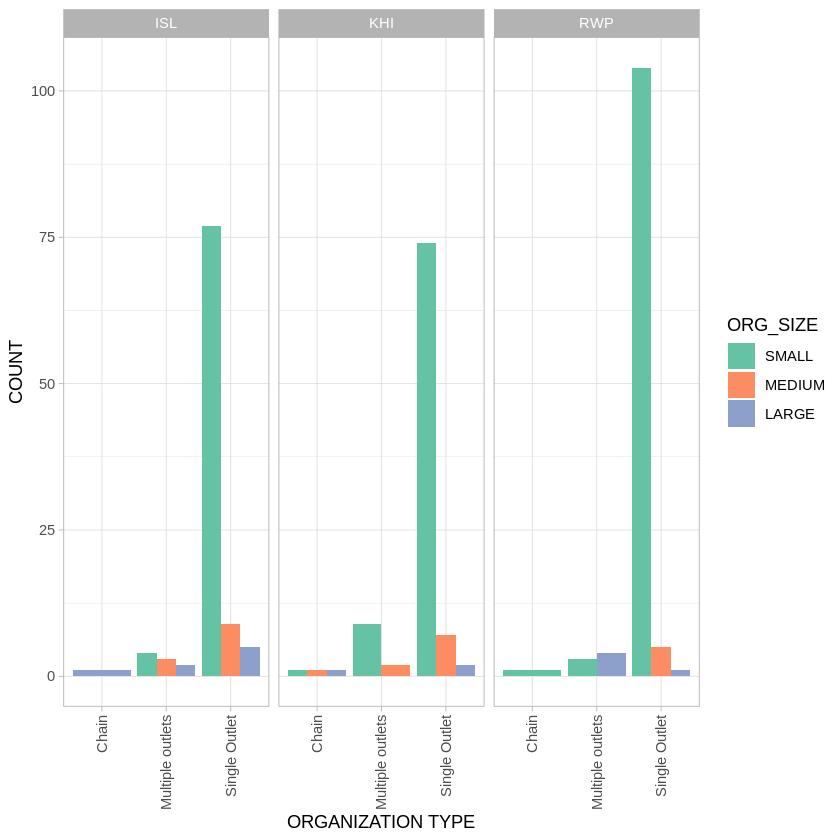

In [198]:
# Stacked Bar Chart

#positions <- c("<5"
#,"5To10"
#,"10+")

g1 <- df_2 %>%
    ggplot(aes(x = ORG_TYPE)) +
    geom_bar(aes(fill = ORG_SIZE), position = "dodge") +
    #facet_wrap(~ ORG_REGION)
    facet_wrap(~ ORG_CITY_CLEAN)

#p.labs <- g + labs(x = "ORG TYPE", y = "COUNT")
#p.labs <- g1 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
#p.labs

# bars are too little to add data labels
g1 <- g1 + labs(x = "ORGANIZATION TYPE", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

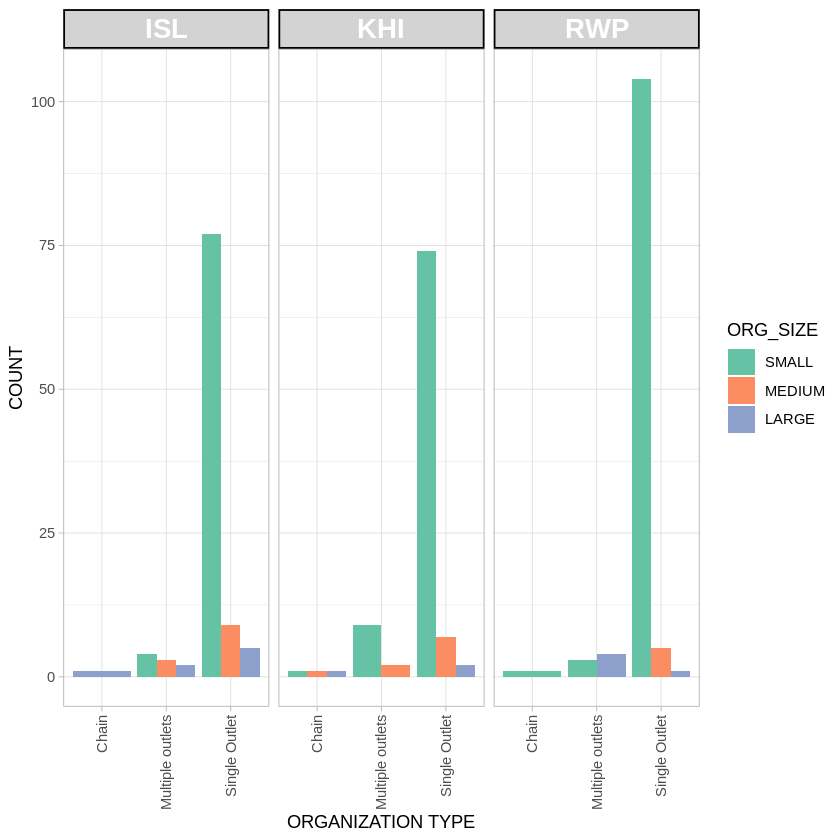

In [199]:
g11 <- g1 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1)
  )

g11

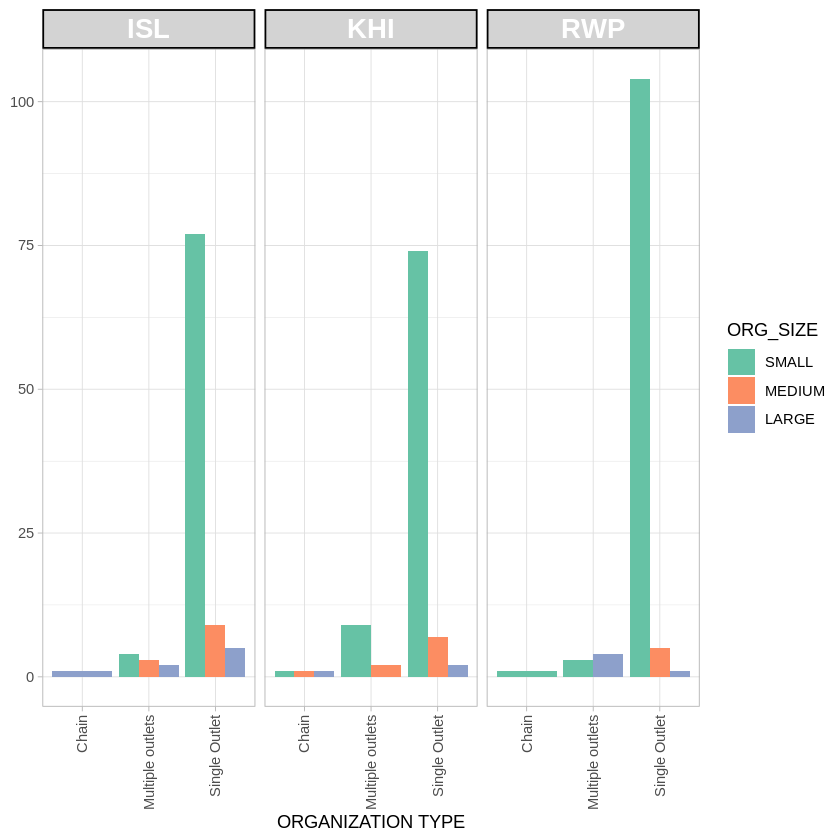

In [200]:
g11 + theme(axis.title.y = element_blank())

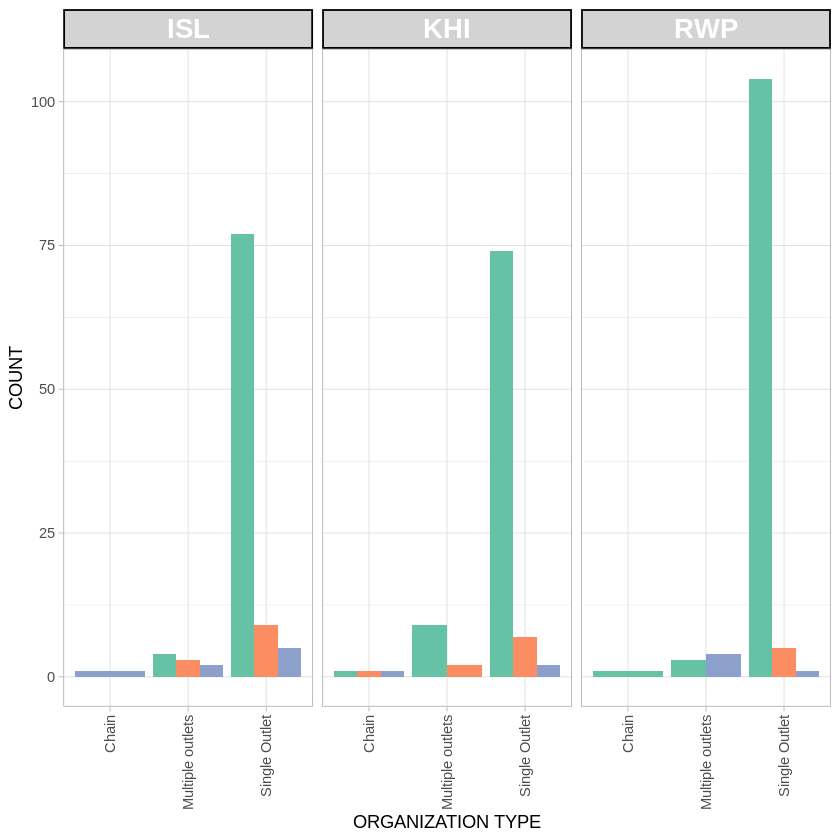

In [201]:
# removing legend
g11 <- g11 + theme(legend.position = "none")
g11

In [202]:
library(knitr)

In [203]:
df_single <- df_2 %>%
    filter(ORG_TYPE == "Single Outlet")

In [204]:
distinct(df_single,ORG_TYPE)

ORG_TYPE
<chr>
Single Outlet


In [205]:
glimpse(df_single)

Rows: 284
Columns: 22
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 36750, 35918, 36750…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Na)", "(Mo…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "Yes", "No", "Yes", "No", "No…
$ INTERNET_PROVIDER     <chr> 

In [206]:
distinct(df_single,ORG_SIZE)

ORG_SIZE
<fct>
SMALL
MEDIUM
LARGE


df_single hereon

In [207]:
df_single %>%
    filter(ORG_SIZE != "<5") %>%
    group_by(ORG_TYPE, ORG_SIZE, ORG_REGION)%>%
    summarise(n=n())%>%
    spread(ORG_TYPE, n)%>%
    kable()

`summarise()` regrouping output by 'ORG_TYPE', 'ORG_SIZE' (override with `.groups` argument)





|ORG_SIZE |ORG_REGION | Single Outlet|
|:--------|:----------|-------------:|
|SMALL    |NORTH      |           181|
|SMALL    |SOUTH      |            74|
|MEDIUM   |NORTH      |            14|
|MEDIUM   |SOUTH      |             7|
|LARGE    |NORTH      |             6|
|LARGE    |SOUTH      |             2|

All Analysis hereon is for the segment:
ORG_TYPE == Single_Outlet
AND
ORG_SIZE == <5


In [208]:
distinct(df_single, ORG_SIZE)

ORG_SIZE
<fct>
SMALL
MEDIUM
LARGE


In [209]:
df_single_5 <- df_single %>%
    filter(ORG_SIZE == "SMALL")

In [210]:
nrow(df_single_5)

[1] 255

In [211]:
nrow(df_single)

[1] 284

In [212]:
nrow(df_2)

[1] 316

In [213]:
nrow(df_1)

[1] 317

In [214]:
255/317

[1] 0.8044164

In [215]:
glimpse(df_single_5)

Rows: 255
Columns: 22
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 36750, 35918, 36750…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Na)", "(Mo…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "Yes", "No", "Yes", "No", "No…
$ INTERNET_PROVIDER     <chr> 

Too much hassle



https://sebastiansauer.github.io/percentage_plot_ggplot2_V2/

In [216]:
g100 <- ggplot(df_single_5, aes(x= EXPANSION,  group=ORG_CITY_CLEAN)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Percent", fill="day") +
    facet_grid(~ORG_CITY_CLEAN) +
    scale_y_continuous(labels = scales::percent)

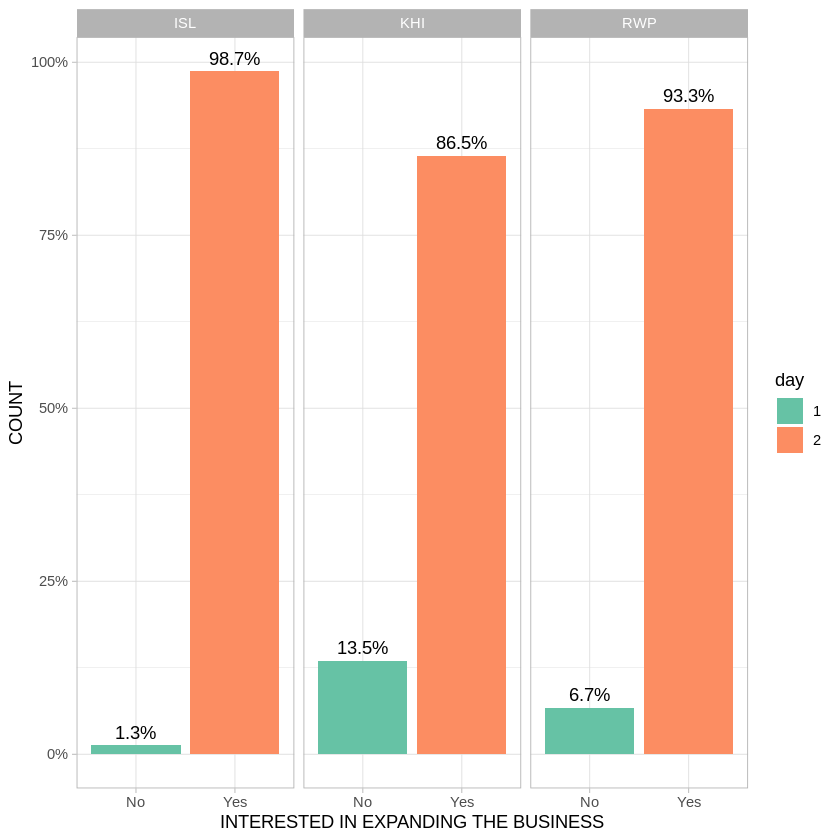

In [217]:
# bars are too little to add data labels
g100 <- g100 + labs(x = "INTERESTED IN EXPANDING THE BUSINESS", y = "COUNT")
g100 <- g100 + scale_fill_brewer(palette = "Set2") 
g100 <- g100 + theme_light()
#g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g100

https://r-graphics.org/recipe-facet-label-appearance

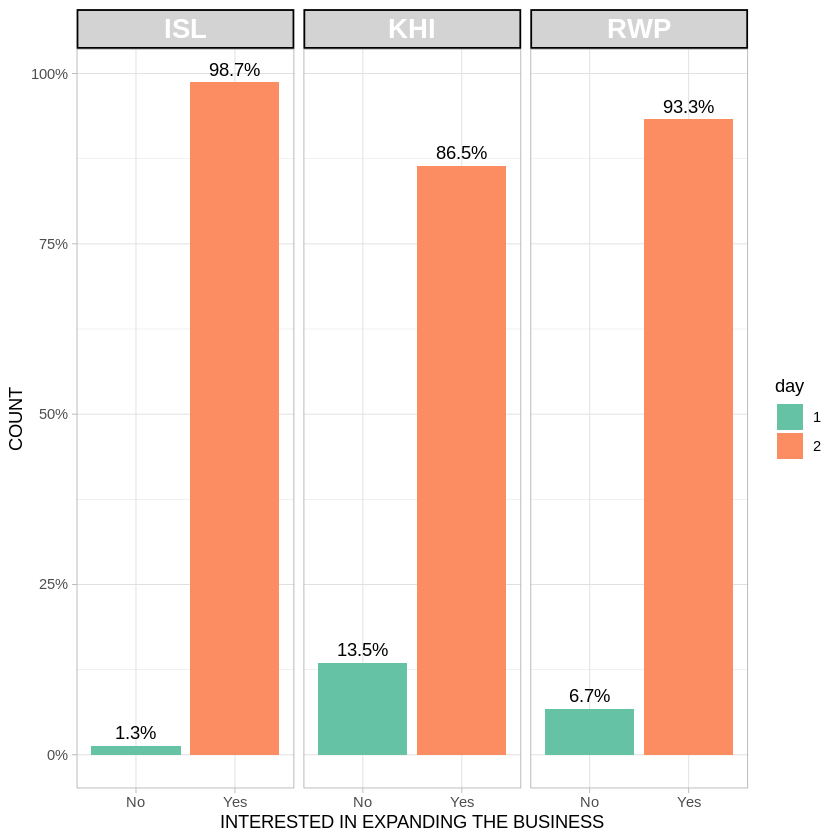

In [218]:
g100<- g100 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1)
  )

g100

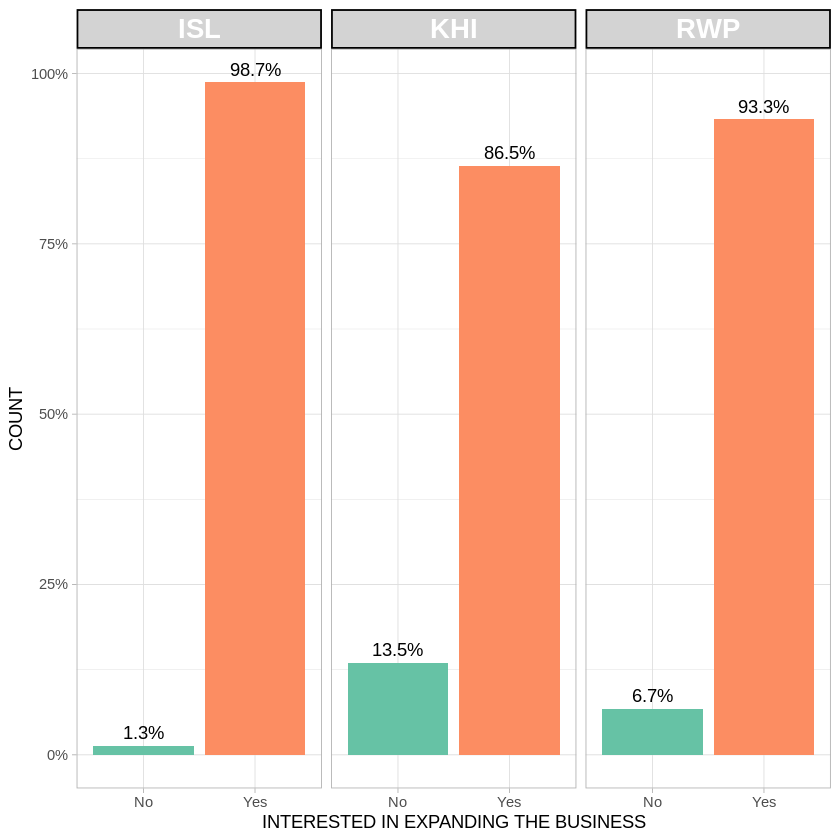

In [219]:
# removing legend
g100 <- g100 + theme(legend.position = "none")
g100

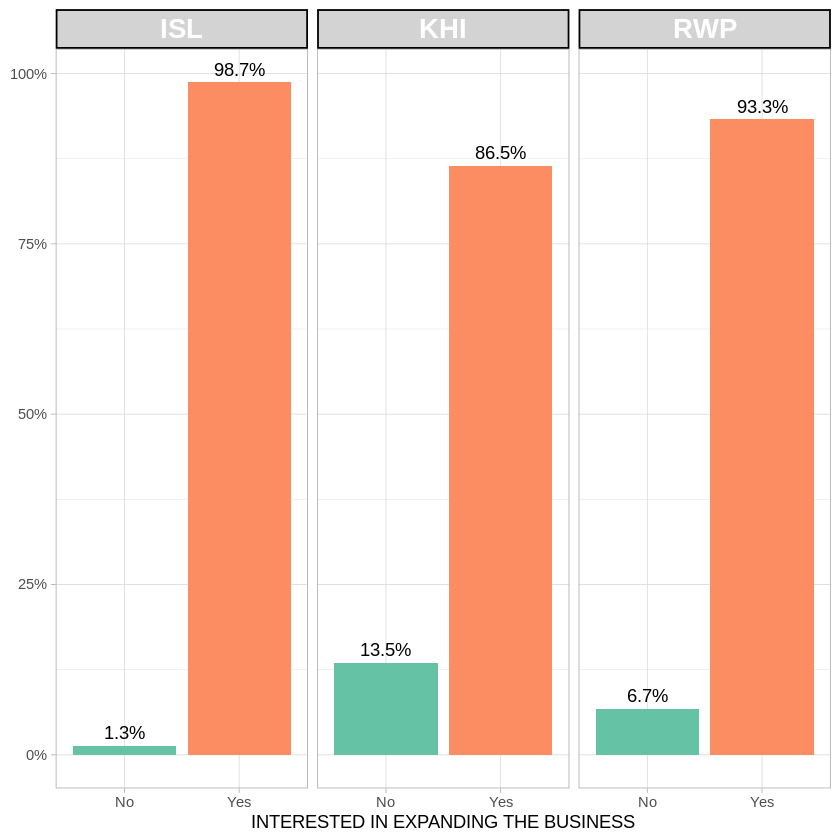

In [220]:
g100 + theme(axis.title.y = element_blank())

In [221]:
df_single_5 %>%
    #filter(ORG_SIZE != "<5") %>%
    group_by(RECONCILIATION)%>%
    summarise(n=n())%>%
    mutate(prop=n/sum(n))%>%
    #subset(select=c("class","cyl","prop"))%>%   #drop the frequency value
    spread(RECONCILIATION, prop)%>%
    kable()

`summarise()` ungrouping output (override with `.groups` argument)





|   n|        No|       Yes|
|---:|---------:|---------:|
| 111| 0.4352941|        NA|
| 144|        NA| 0.5647059|

Graph 10

In [222]:
g101 <- ggplot(df_single_5, aes(x= RECONCILIATION,  group=ORG_CITY_CLEAN)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Percent", fill="RECONCILIATION") +
    facet_grid(~ORG_CITY_CLEAN) +
    scale_y_continuous(labels = scales::percent)

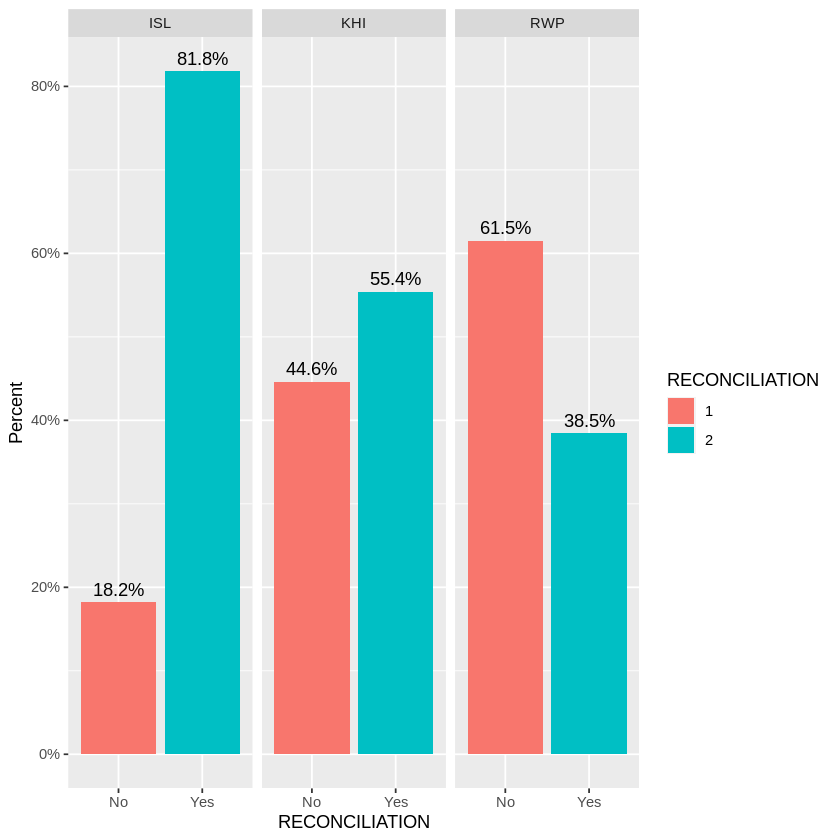

In [223]:
g101

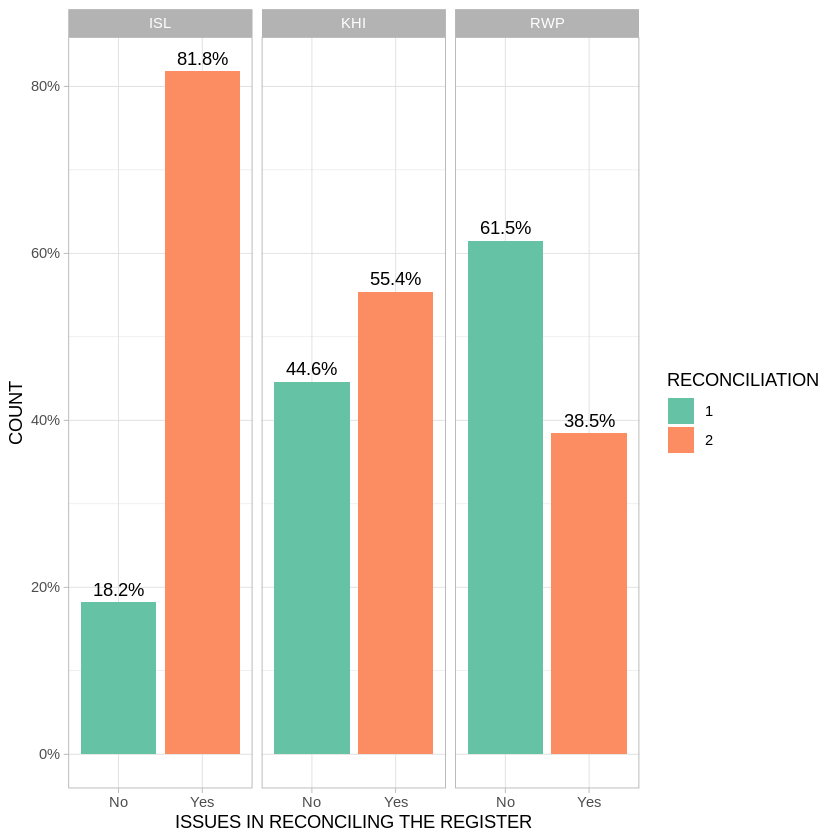

In [224]:
# bars are too little to add data labels
# Issue in Register Reconciliation
g101 <- g101 + labs(x = "ISSUES IN RECONCILING THE REGISTER", y = "COUNT")
g101 <- g101 + scale_fill_brewer(palette = "Set2") 
g101 <- g101 + theme_light()
#g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g101

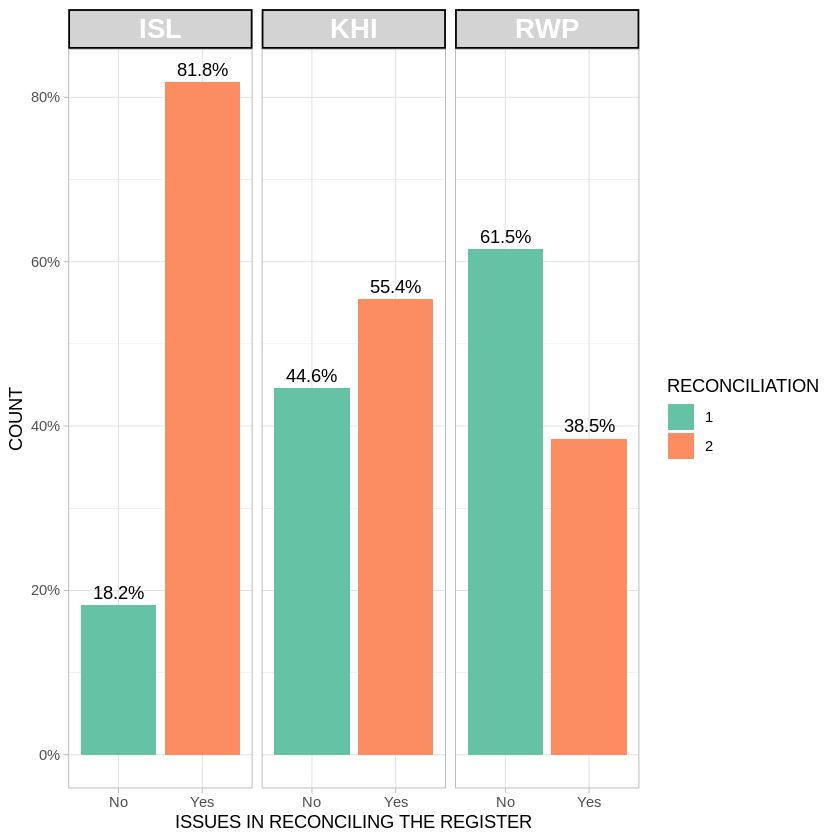

In [225]:
g101 <- g101 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1)
  )

g101

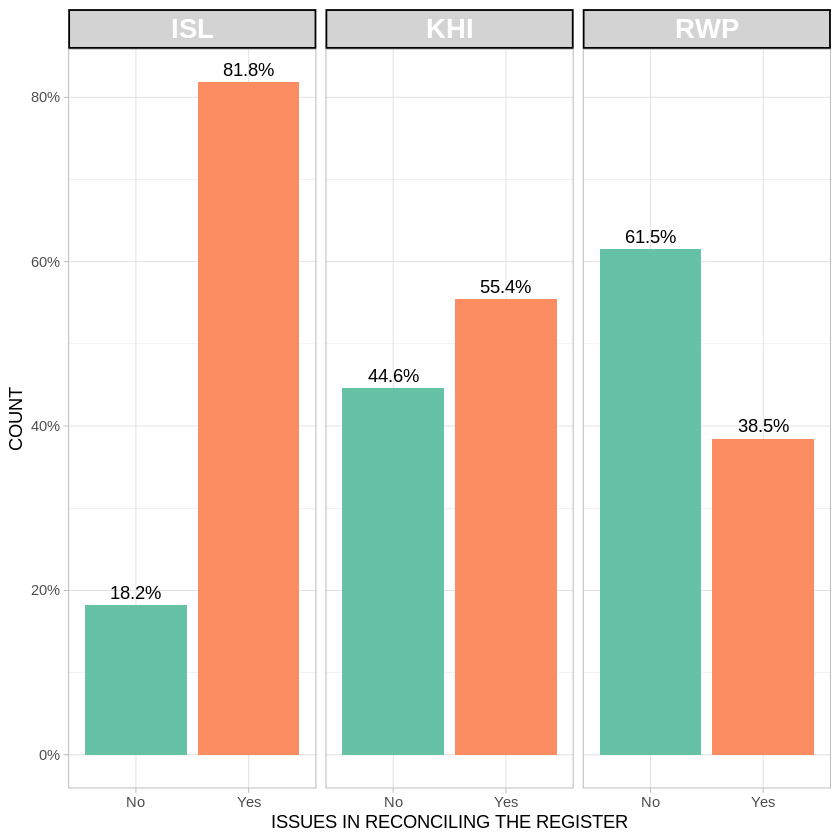

In [226]:
# removing legend
g101 <- g101 + theme(legend.position = "none")
g101

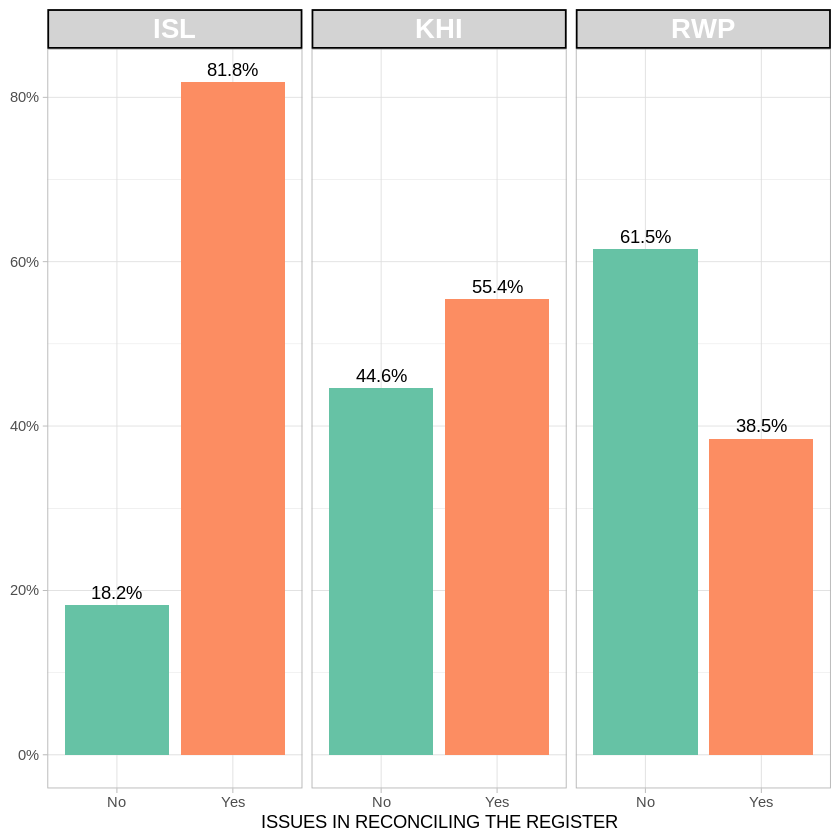

In [227]:
g101 + theme(axis.title.y = element_blank())

Graph 11

In [228]:
glimpse(df_single_5)

Rows: 255
Columns: 22
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 36750, 35918, 36750…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Na)", "(Mo…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "Yes", "No", "Yes", "No", "No…
$ INTERNET_PROVIDER     <chr> 

In [229]:
# recode LANGUAGE_PREF

df_single_5 = df_single_5 %>%
  mutate(LANGUAGE_PREF_RECODE = recode(LANGUAGE_PREF, "Both, English & Urdu" = "BOTH",
  "English" = "ENGLISH",
  "Urdu" = "URDU"))

In [230]:
# remove garbage from LANGUAGE_PREF
df_single_5 <- df_single_5 %>%
  filter(LANGUAGE_PREF_RECODE == "BOTH" | LANGUAGE_PREF_RECODE == "ENGLISH" | LANGUAGE_PREF_RECODE == "URDU" )

In [231]:
distinct(df_single_5,LANGUAGE_PREF_RECODE)

LANGUAGE_PREF_RECODE
<chr>
BOTH
ENGLISH
URDU


In [232]:
g102 <- ggplot(df_single_5, aes(x= LANGUAGE_PREF_RECODE,  group=ORG_CITY_CLEAN)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Percent", fill="LANGUAGE_PREF_RECODE") +
    facet_grid(~ORG_CITY_CLEAN) +
    scale_y_continuous(labels = scales::percent)

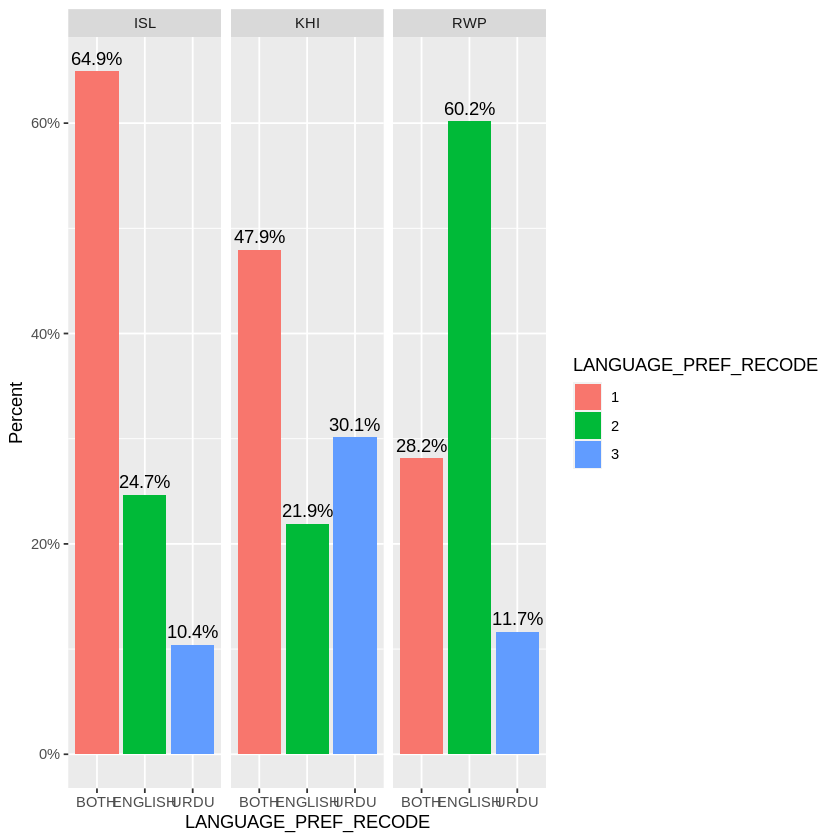

In [233]:
g102

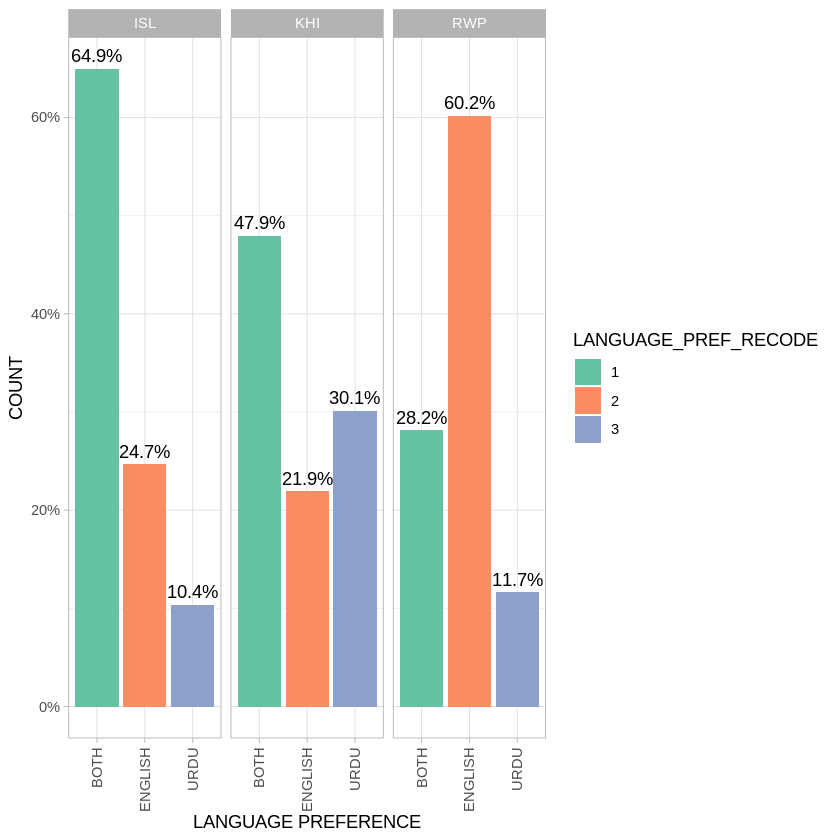

In [234]:
# bars are too little to add data labels
# Issue in Register Reconciliation
g102 <- g102 + labs(x = "LANGUAGE PREFERENCE", y = "COUNT")
g102 <- g102 + scale_fill_brewer(palette = "Set2") 
g102 <- g102 + theme_light()
g102 <- g102 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g102

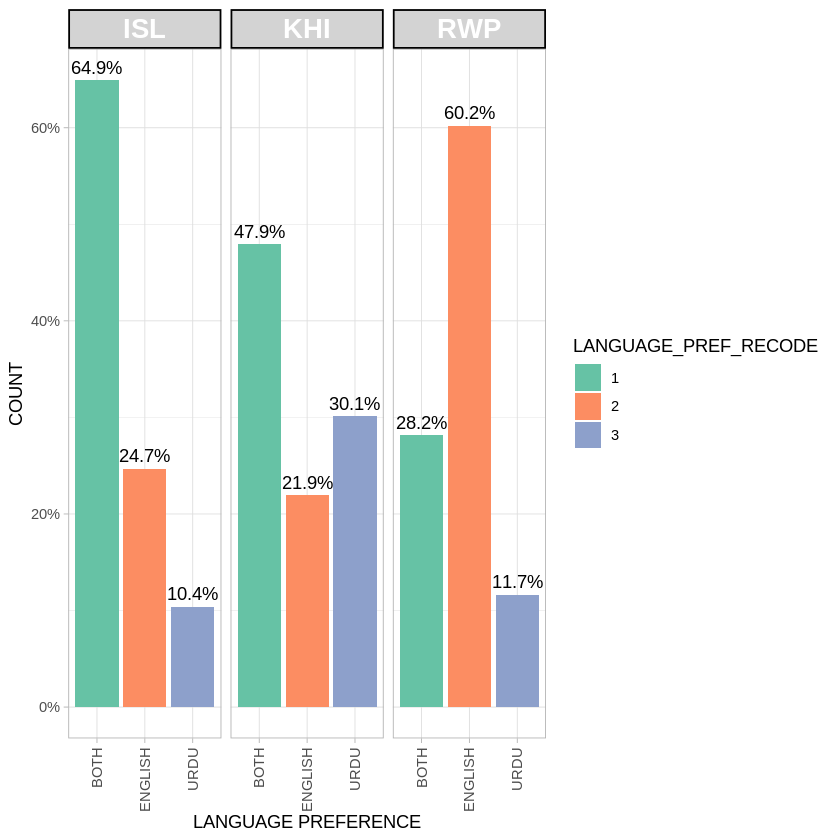

In [235]:
g102 <- g102 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1)
  )

g102

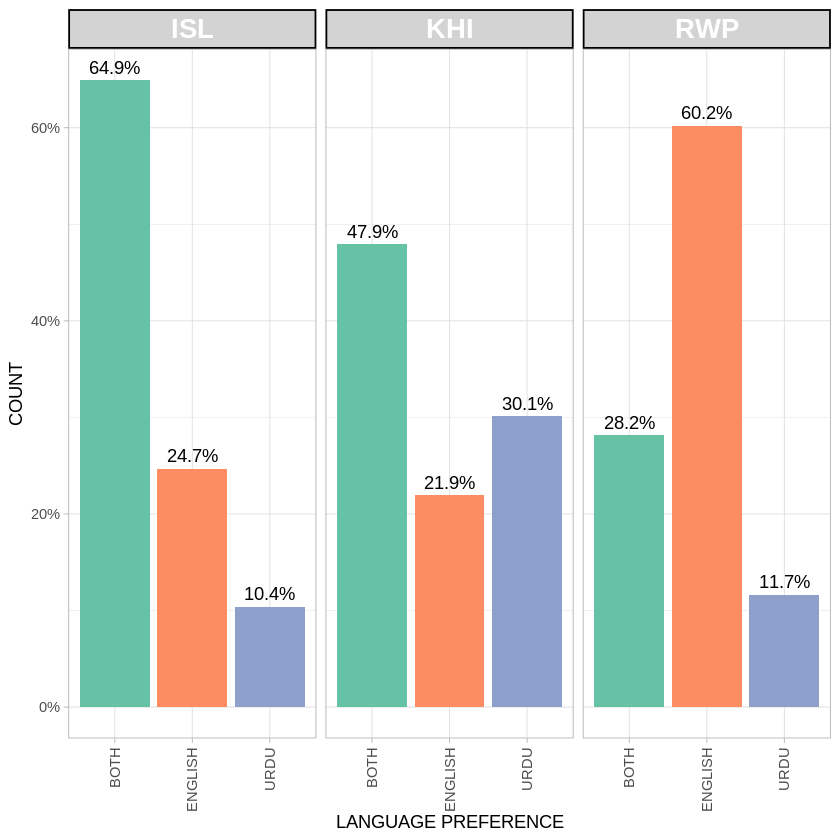

In [236]:
# removing legend
g102 <- g102 + theme(legend.position = "none")
g102

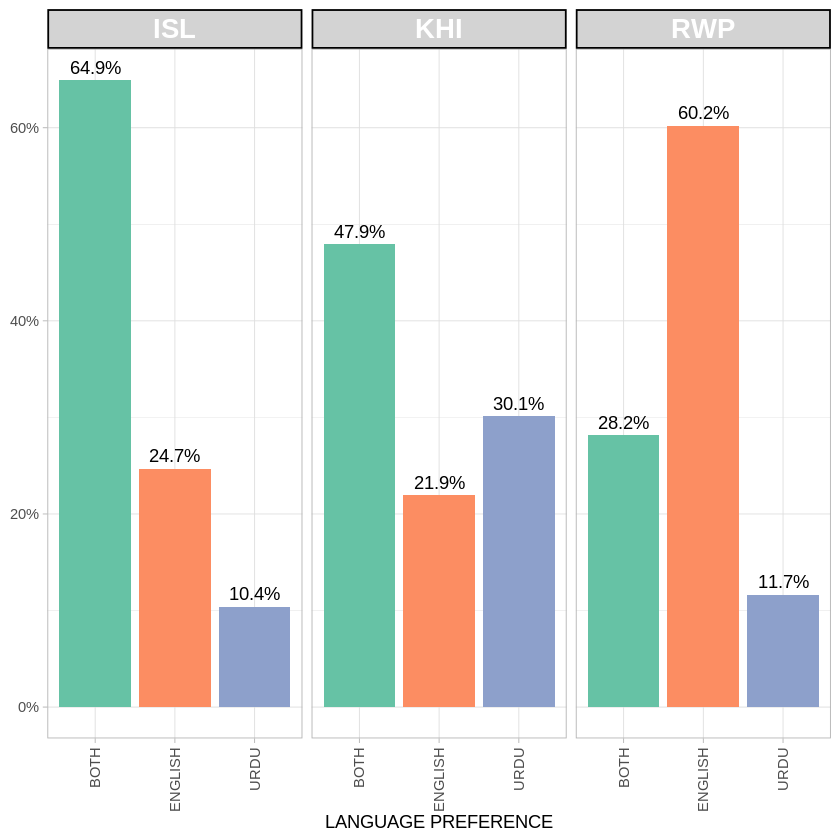

In [237]:
g102 + theme(axis.title.y = element_blank())

Graph 12

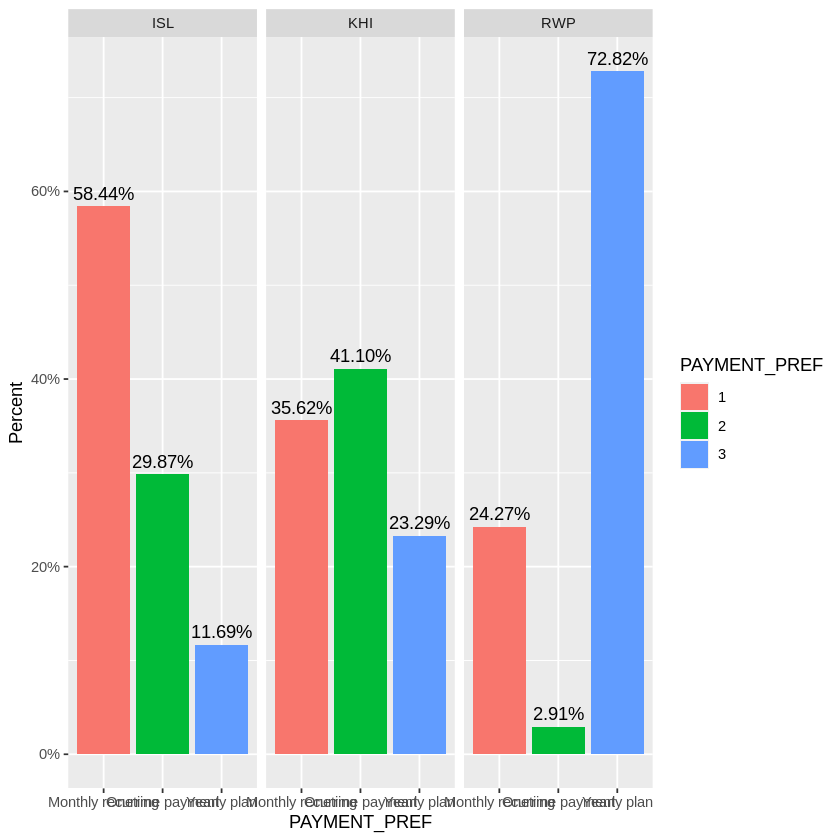

In [238]:
g103 <- ggplot(df_single_5, aes(x= PAYMENT_PREF,  group=ORG_CITY_CLEAN)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Percent", fill="PAYMENT_PREF") +
    facet_grid(~ORG_CITY_CLEAN) +
    scale_y_continuous(labels = scales::percent)

g103

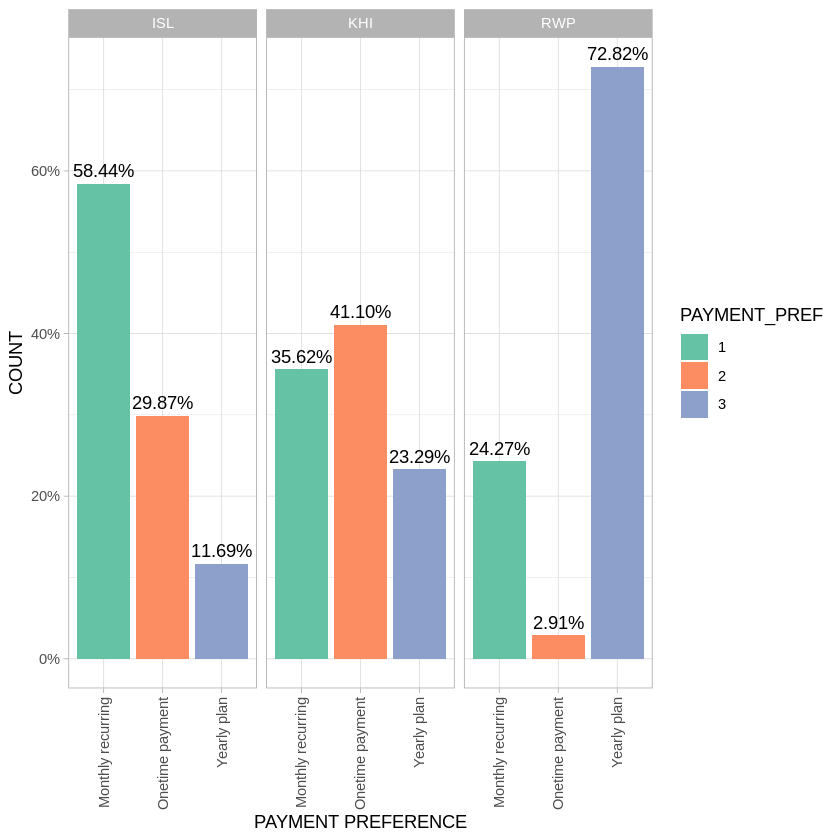

In [239]:
# bars are too little to add data labels
# Issue in Register Reconciliation
g103 <- g103 + labs(x = "PAYMENT PREFERENCE", y = "COUNT")
g103 <- g103 + scale_fill_brewer(palette = "Set2") 
g103 <- g103 + theme_light()
g103 <- g103 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g103

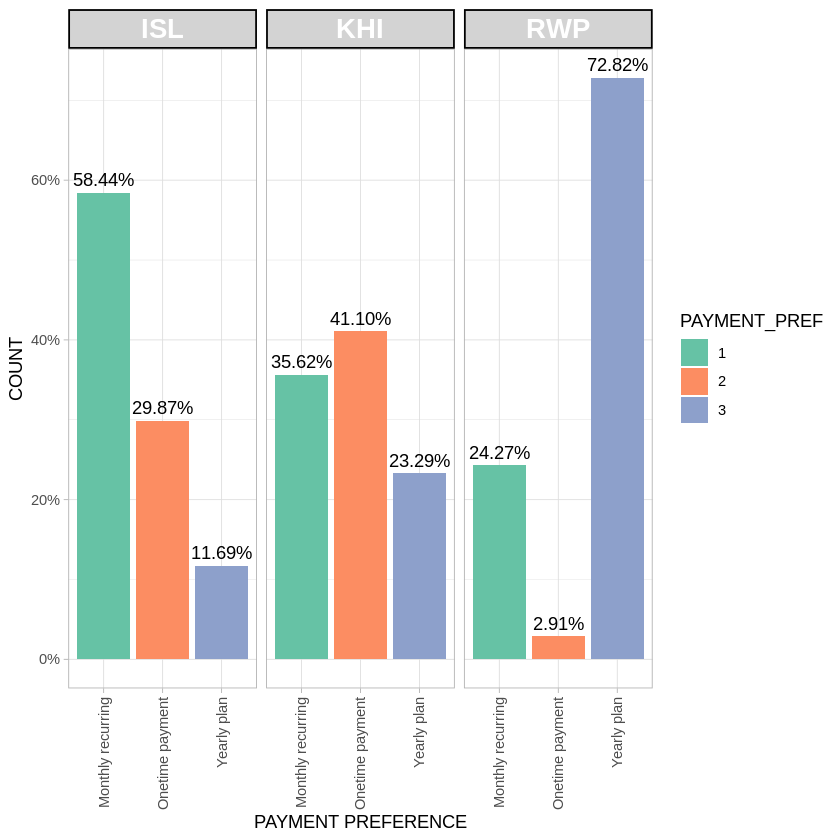

In [240]:
g103 <- g103 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1)
  )

g103

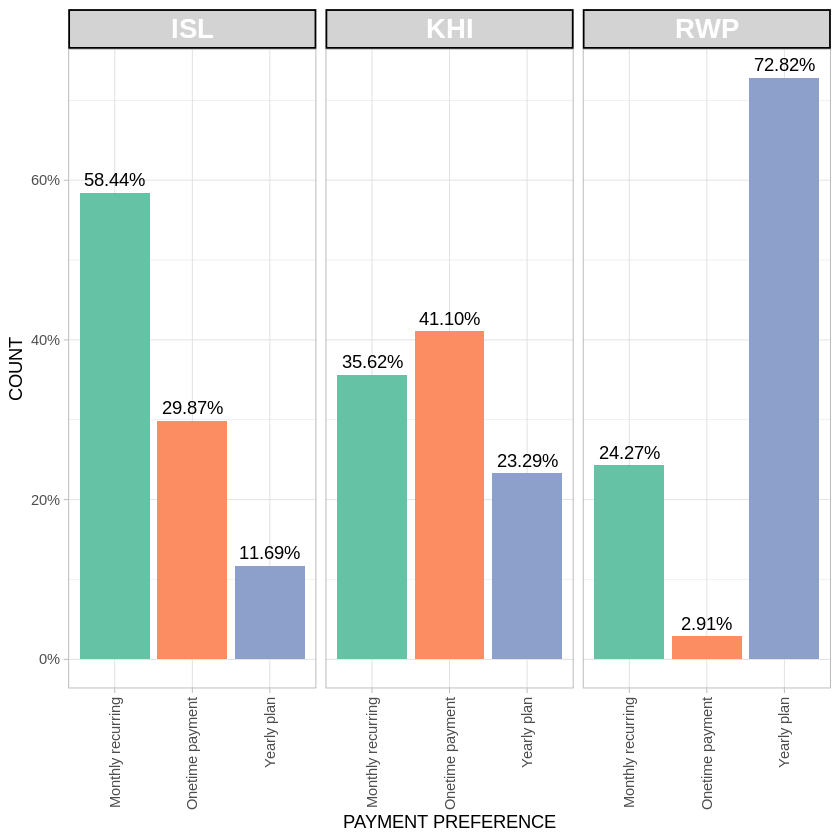

In [241]:
# removing legend
g103 <- g103 + theme(legend.position = "none")
g103

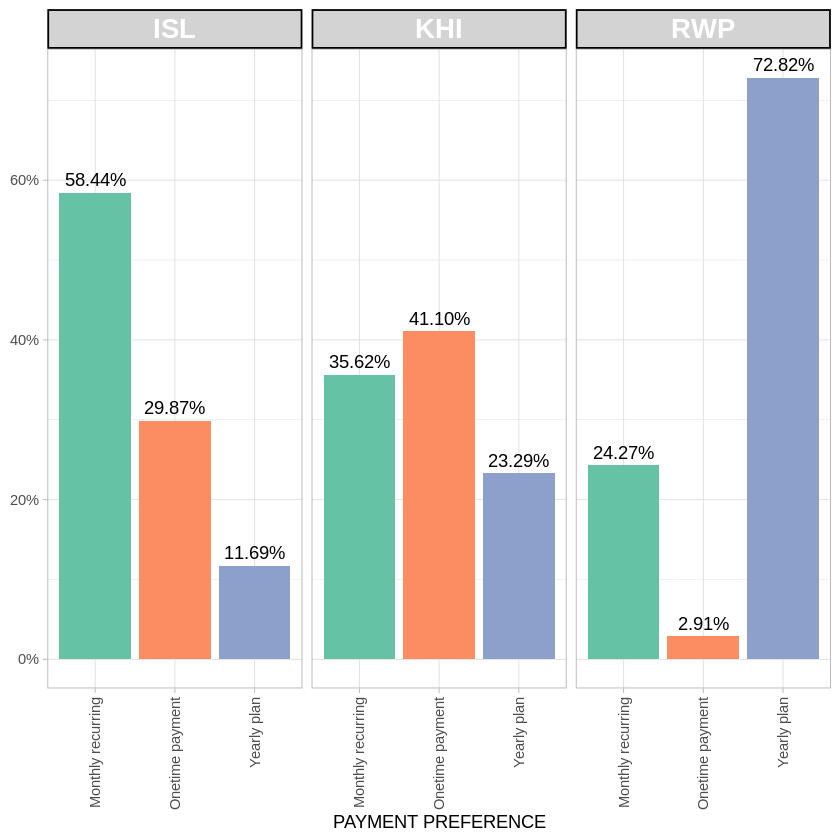

In [242]:
g103 + theme(axis.title.y = element_blank())

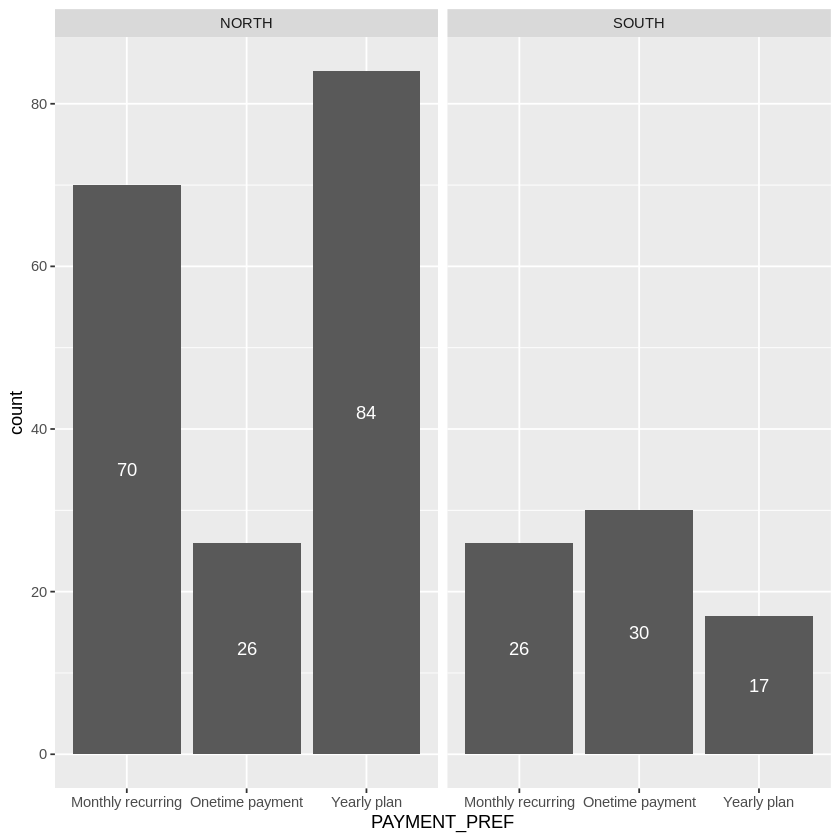

In [243]:
g11 <- df_single_5 %>%
  ggplot(aes(x = PAYMENT_PREF)) + 
  geom_bar()  +
  facet_wrap(~ ORG_REGION)

p.labs <- g11 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

Graph 14

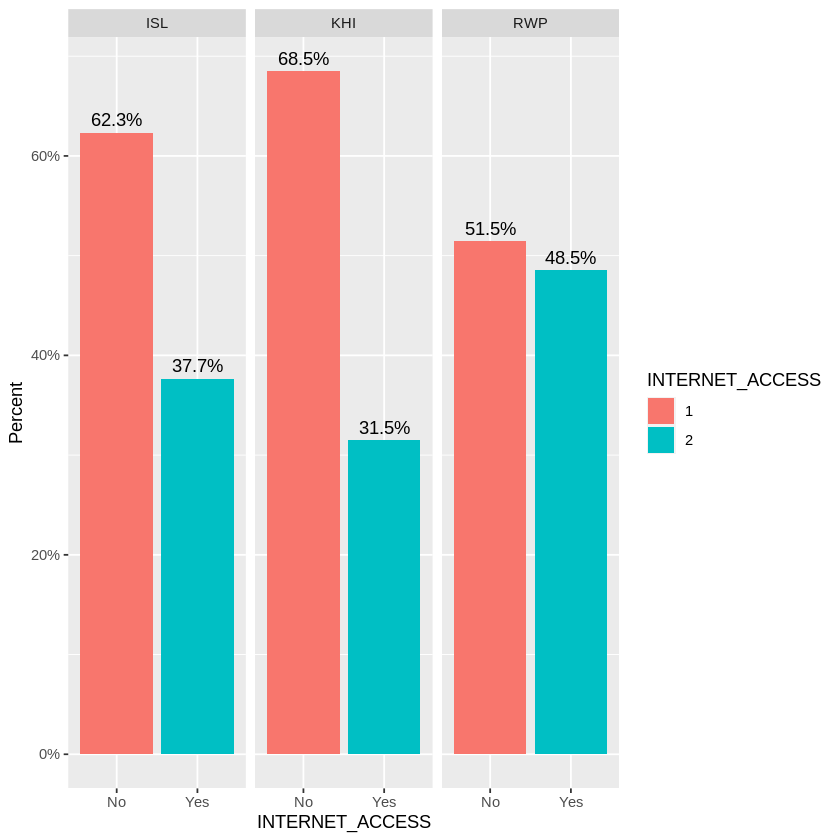

In [244]:
g104 <- ggplot(df_single_5, aes(x= INTERNET_ACCESS,  group=ORG_CITY_CLEAN)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Percent", fill="INTERNET_ACCESS") +
    facet_grid(~ORG_CITY_CLEAN) +
    scale_y_continuous(labels = scales::percent)

g104

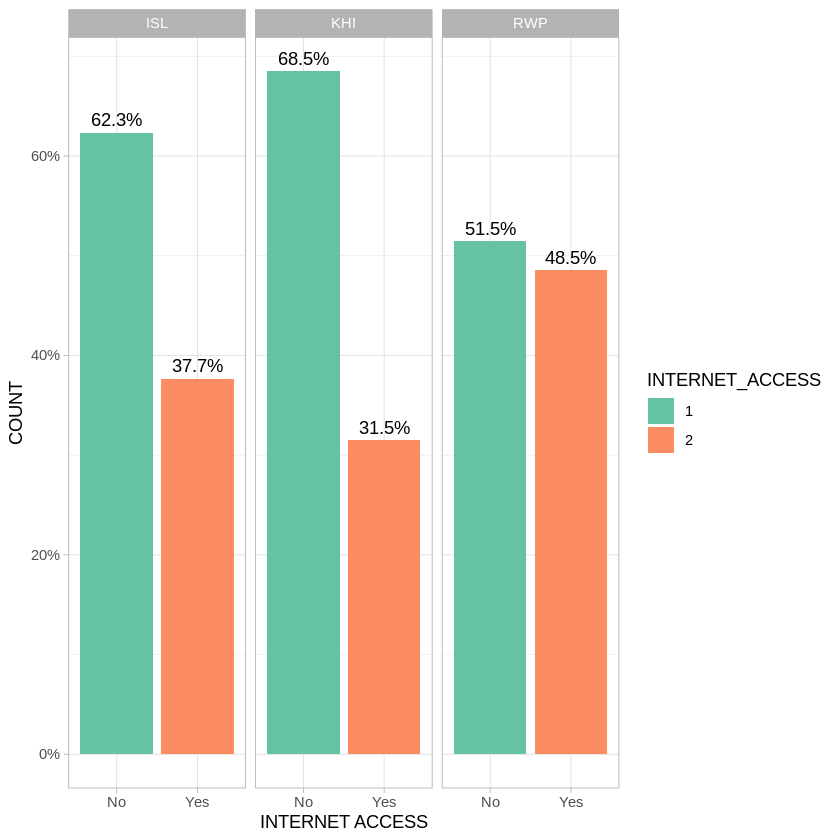

In [245]:
# bars are too little to add data labels
# Issue in Register Reconciliation
g104 <- g104 + labs(x = "INTERNET ACCESS", y = "COUNT")
g104 <- g104 + scale_fill_brewer(palette = "Set2") 
g104 <- g104 + theme_light()
#g104 <- g104 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g104

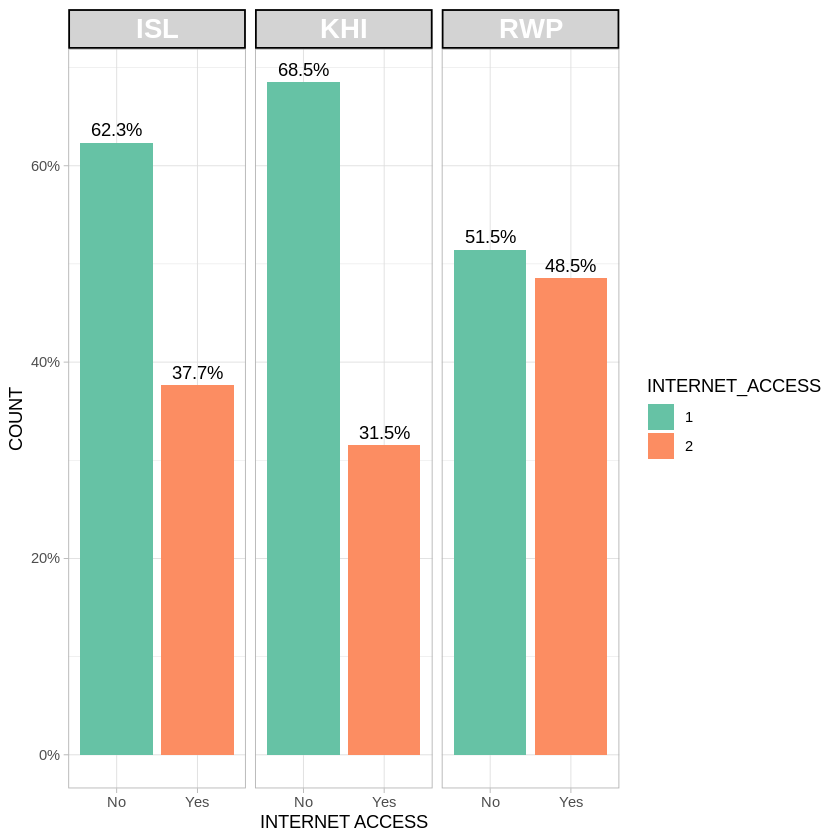

In [246]:
g104 <- g104 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1)
  )

g104

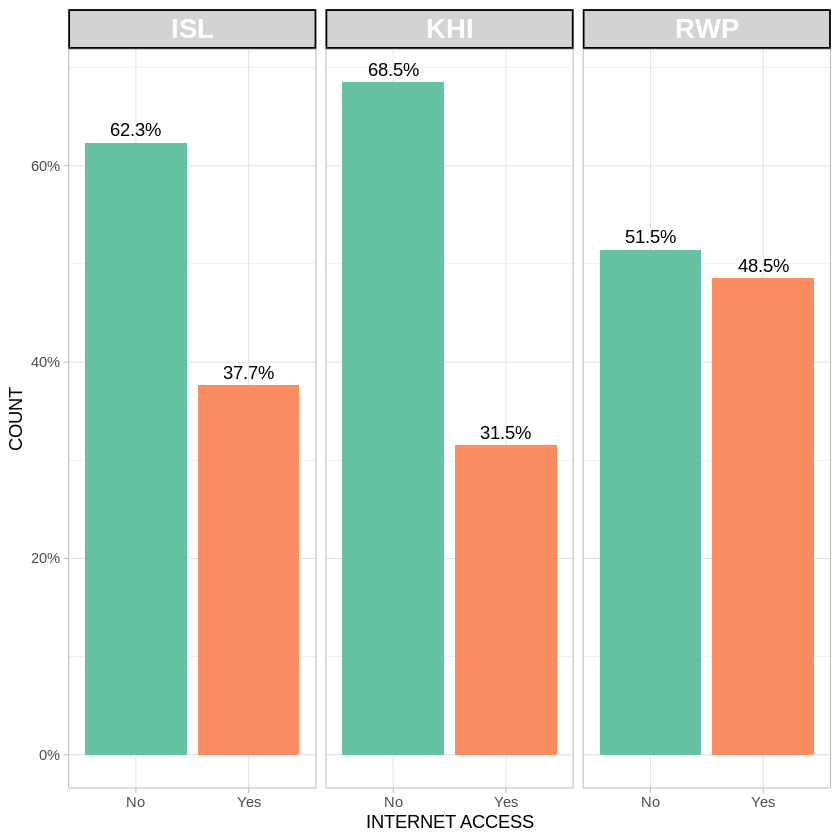

In [247]:
# removing legend
g104 <- g104 + theme(legend.position = "none")
g104

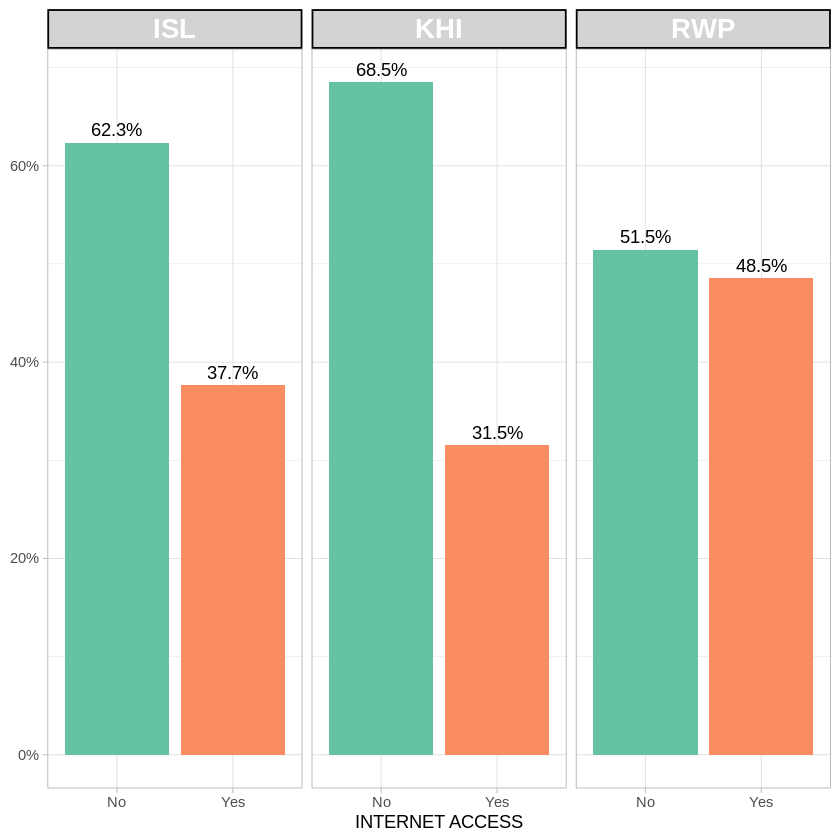

In [248]:
g104 + theme(axis.title.y = element_blank())

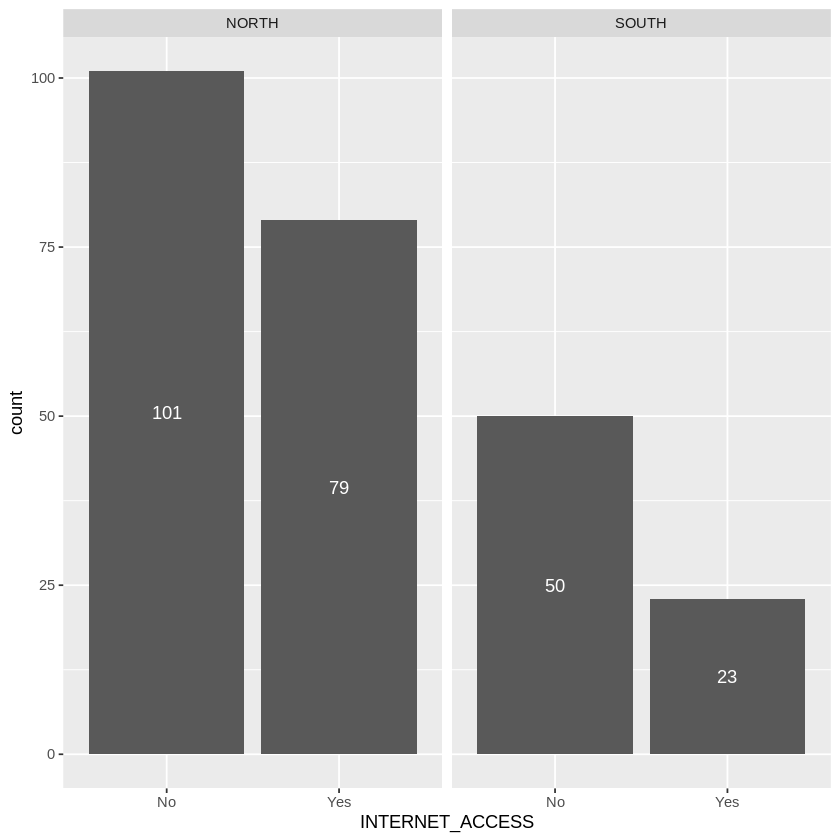

In [249]:
g20 <- df_single_5 %>%
  ggplot(aes(x = INTERNET_ACCESS)) + 
  geom_bar() +
  facet_wrap(~ ORG_REGION)

p.labs <- g20 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

Graph 15

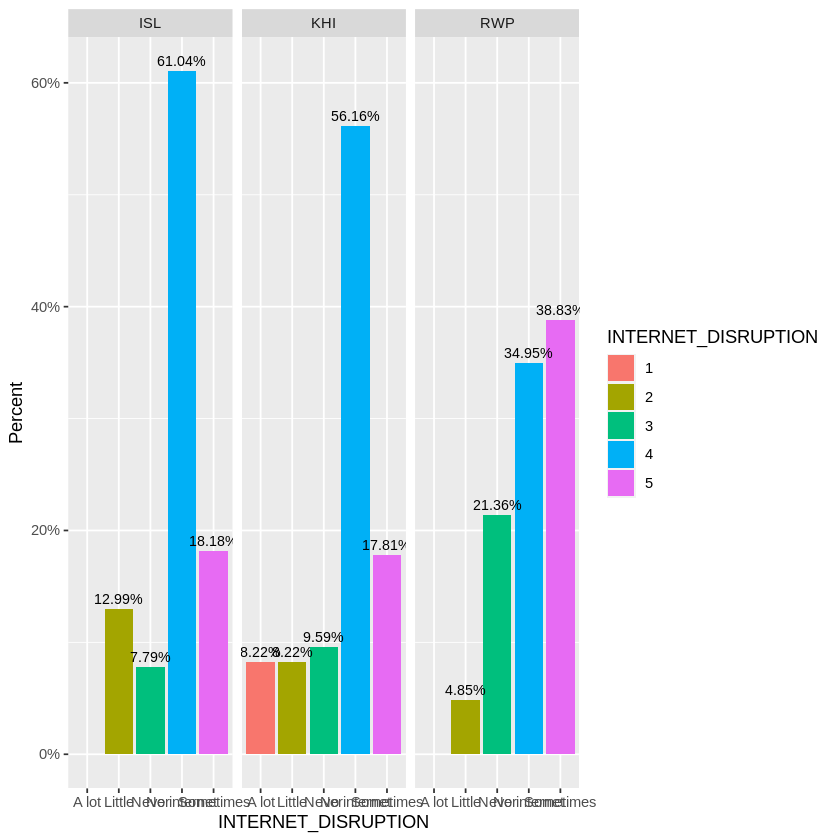

In [250]:
g105 <- ggplot(df_single_5, aes(x= INTERNET_DISRUPTION,  group=ORG_CITY_CLEAN)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5, size=3) +
    labs(y = "Percent", fill="INTERNET_DISRUPTION") +
    facet_grid(~ORG_CITY_CLEAN) +
    scale_y_continuous(labels = scales::percent)

g105

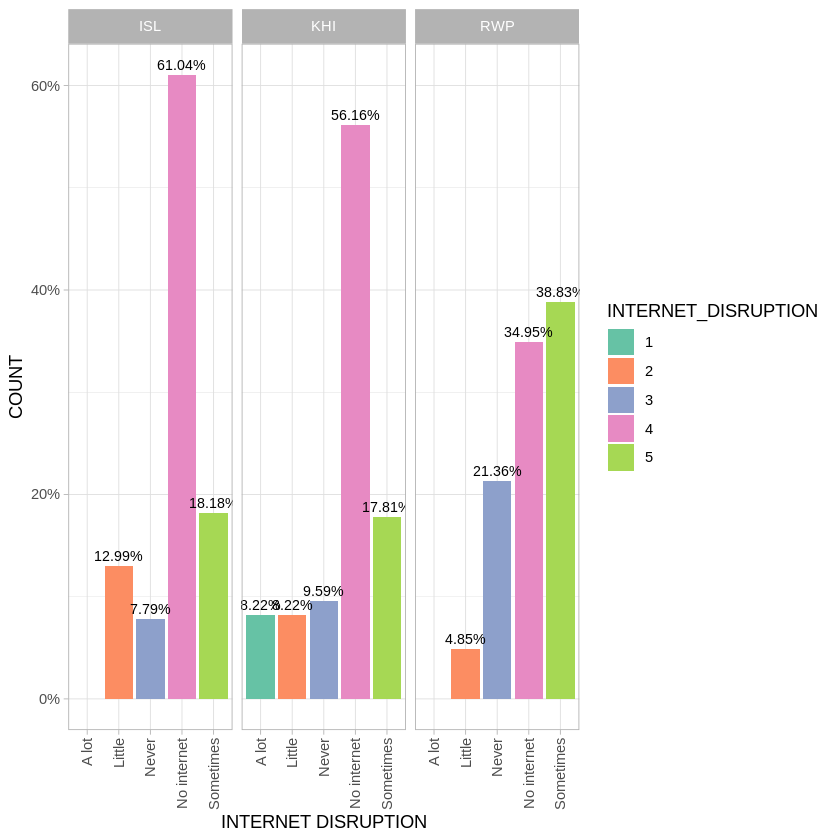

In [251]:
# bars are too little to add data labels
# Issue in Register Reconciliation
g105 <- g105 + labs(x = "INTERNET DISRUPTION", y = "COUNT")
g105 <- g105 + scale_fill_brewer(palette = "Set2") 
g105 <- g105 + theme_light()
g105 <- g105 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g105

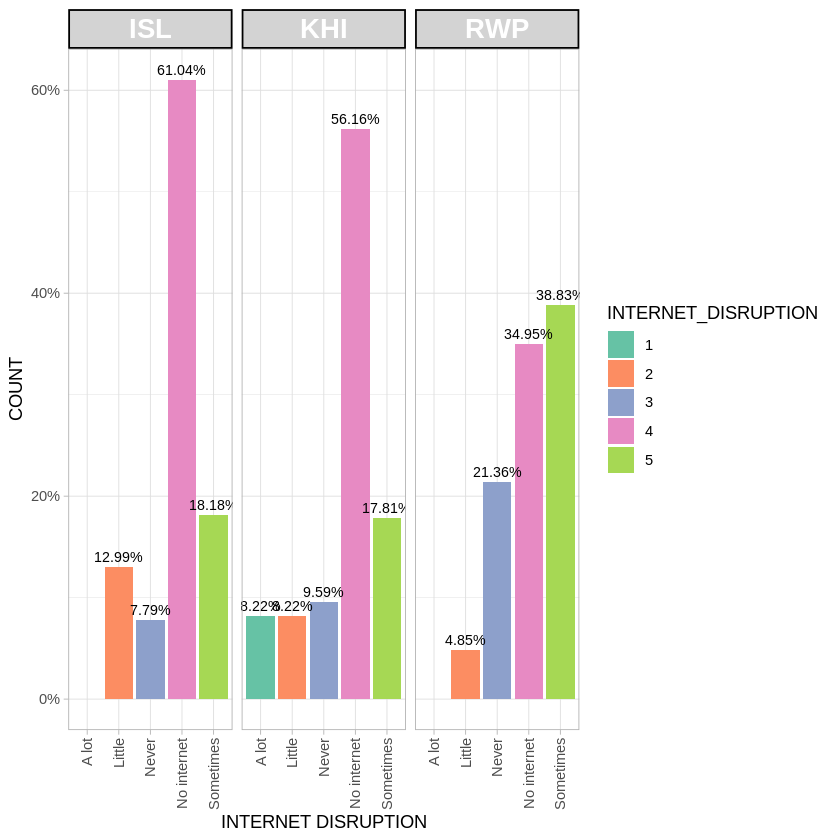

In [252]:
g105 <- g105 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1)
  )

g105

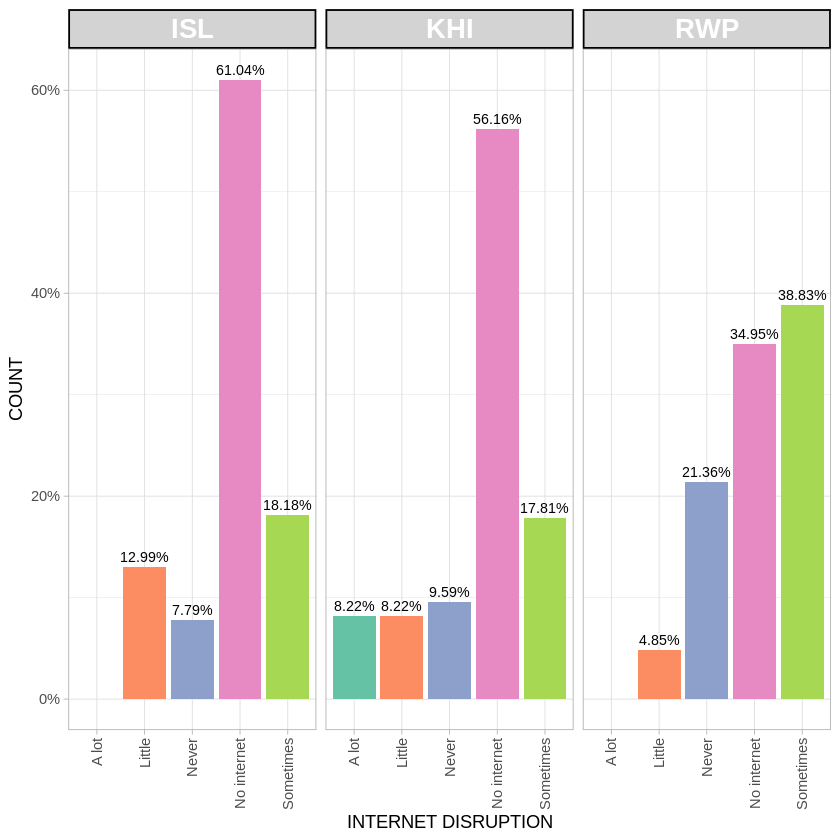

In [253]:
# removing legend
g105 <- g105 + theme(legend.position = "none")
g105

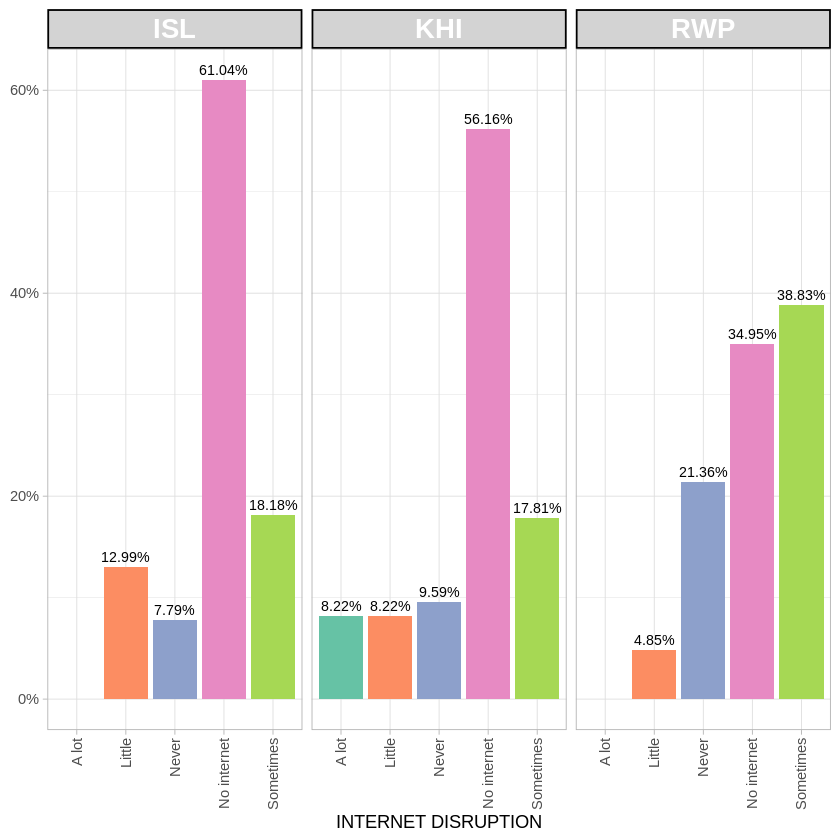

In [254]:
g105 + theme(axis.title.y = element_blank())

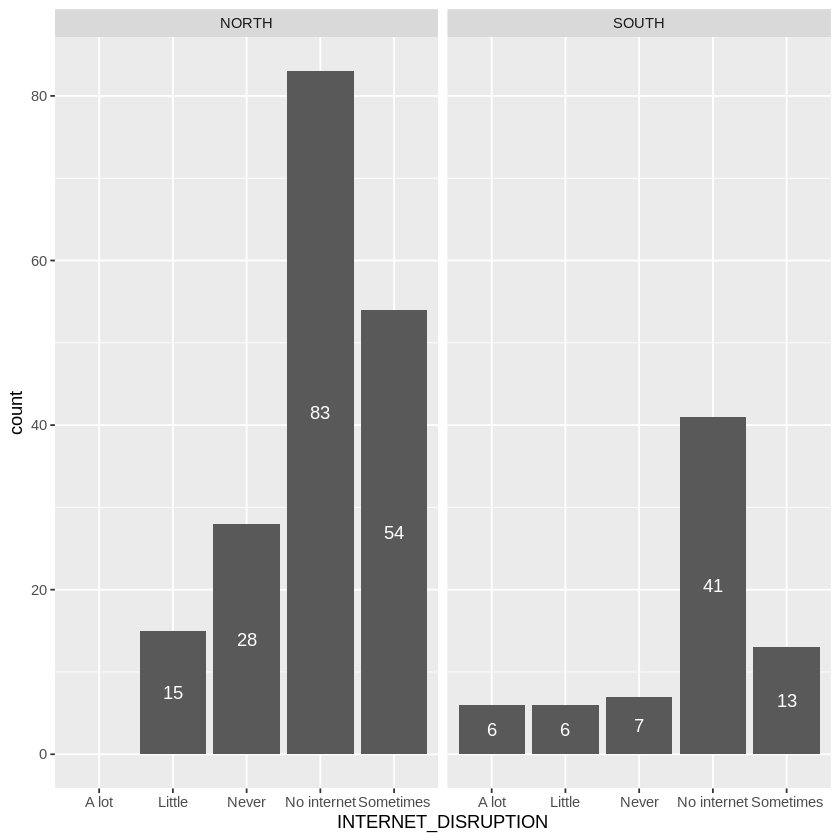

In [255]:
g10 <- df_single_5 %>%
  ggplot(aes(x = INTERNET_DISRUPTION)) + 
  geom_bar() +
  facet_wrap(~ ORG_REGION)

p.labs <- g10 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

Graph 16

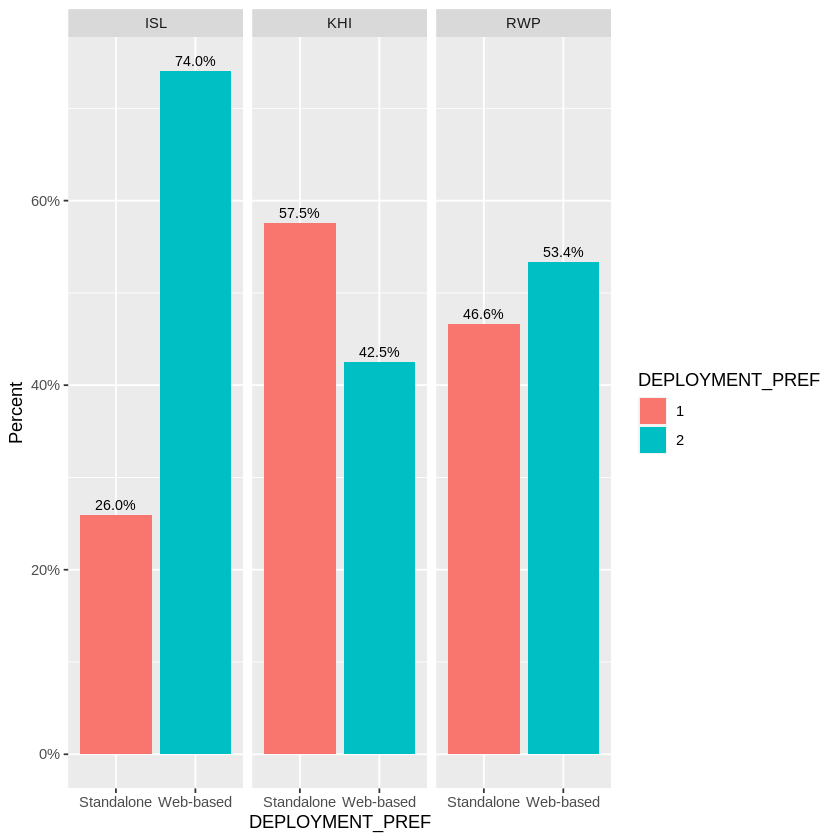

In [256]:
g106 <- ggplot(df_single_5, aes(x= DEPLOYMENT_PREF,  group=ORG_CITY_CLEAN)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5, size=3) +
    labs(y = "Percent", fill="DEPLOYMENT_PREF") +
    facet_grid(~ORG_CITY_CLEAN) +
    scale_y_continuous(labels = scales::percent)

g106

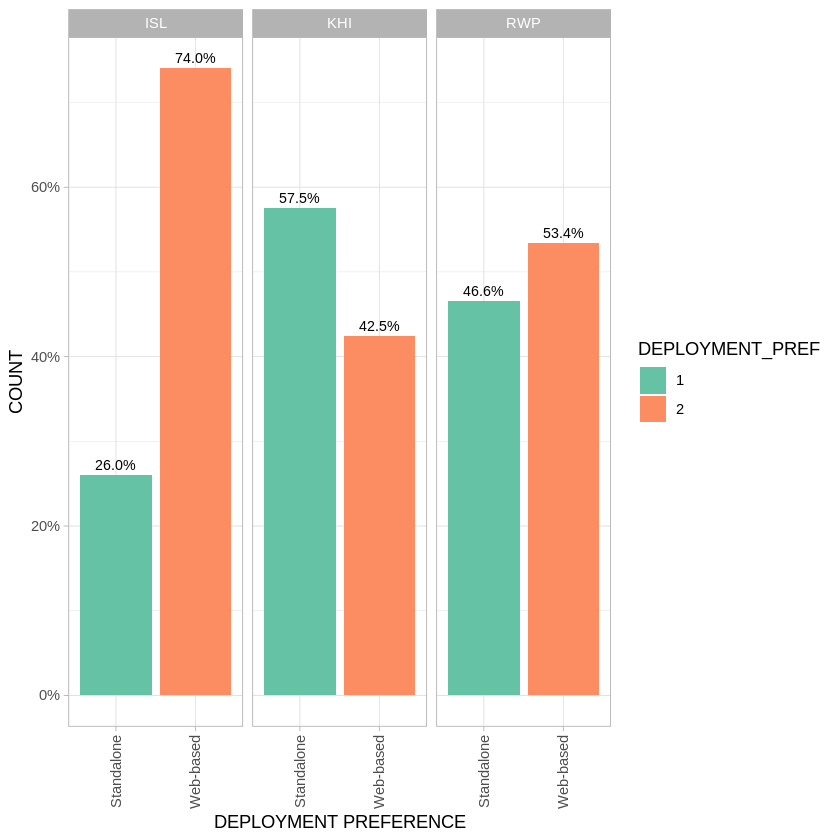

In [257]:
# bars are too little to add data labels
# Issue in Register Reconciliation
g106 <- g106 + labs(x = "DEPLOYMENT PREFERENCE", y = "COUNT")
g106 <- g106 + scale_fill_brewer(palette = "Set2") 
g106 <- g106 + theme_light()
g106 <- g106 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g106

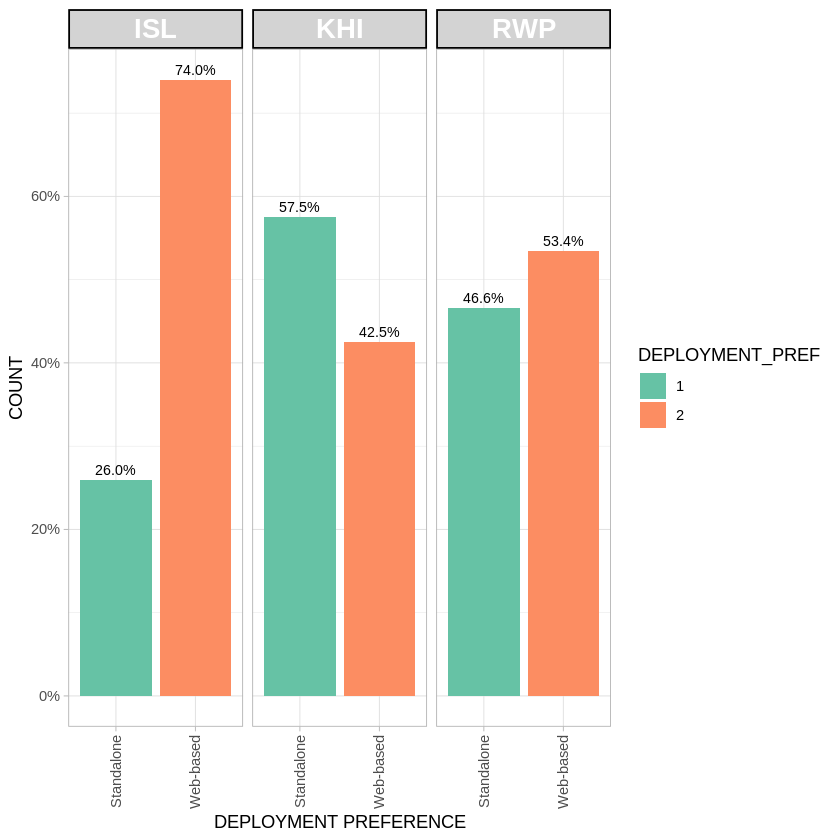

In [258]:
g106 <- g106 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1)
  )

g106

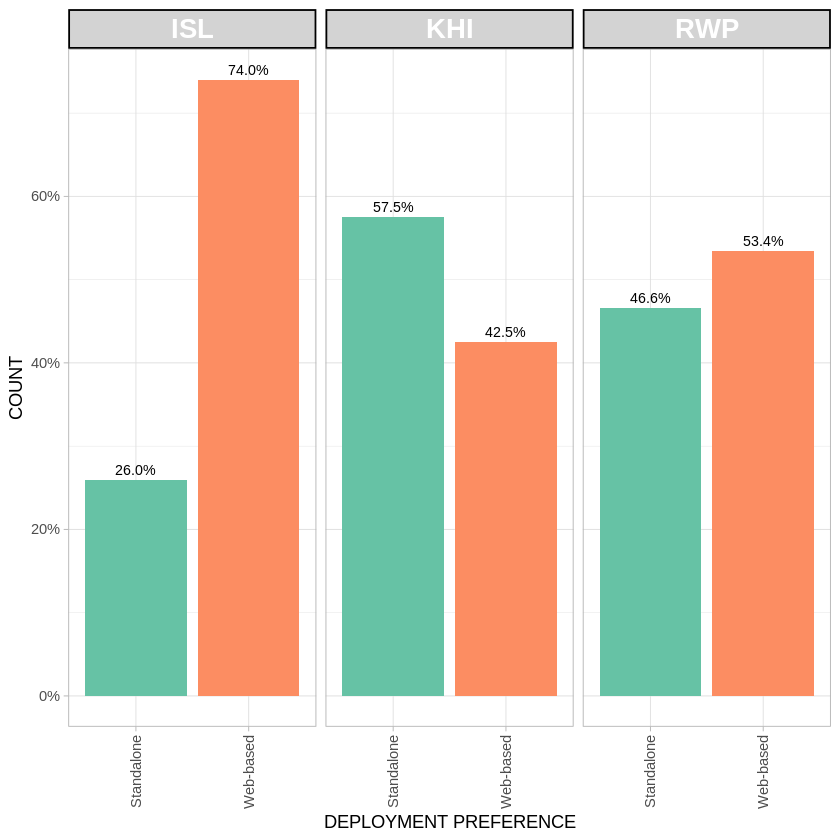

In [259]:
# removing legend
g106 <- g106 + theme(legend.position = "none")
g106

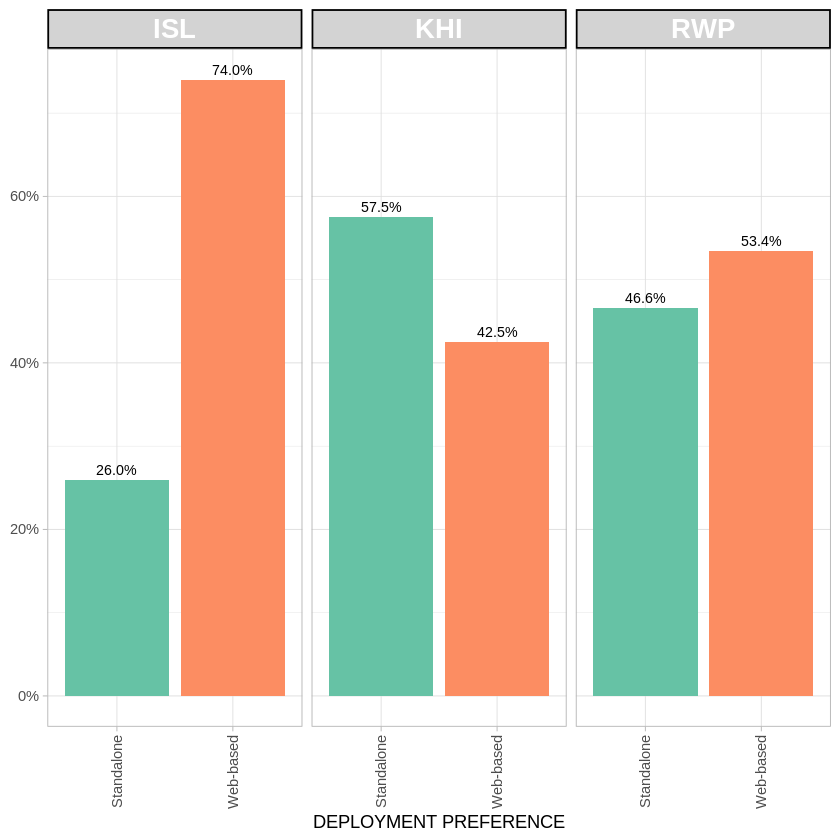

In [260]:
g106 + theme(axis.title.y = element_blank())

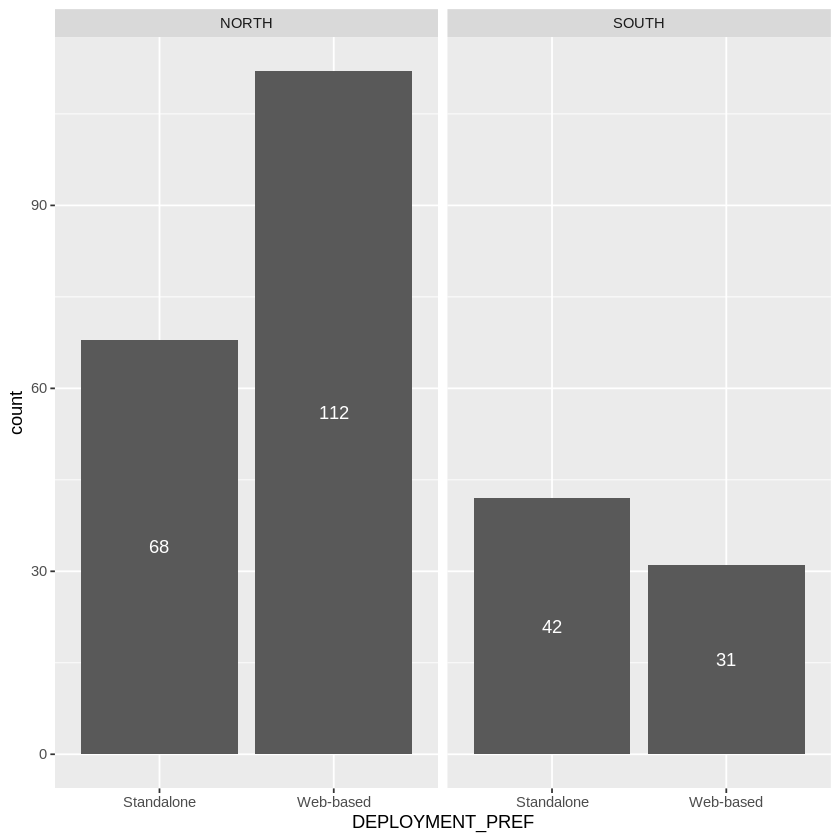

In [261]:
g10 <- df_single_5 %>%
  ggplot(aes(x = DEPLOYMENT_PREF)) + 
  geom_bar() +
  facet_wrap(~ ORG_REGION)

p.labs <- g10 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

Graph 17

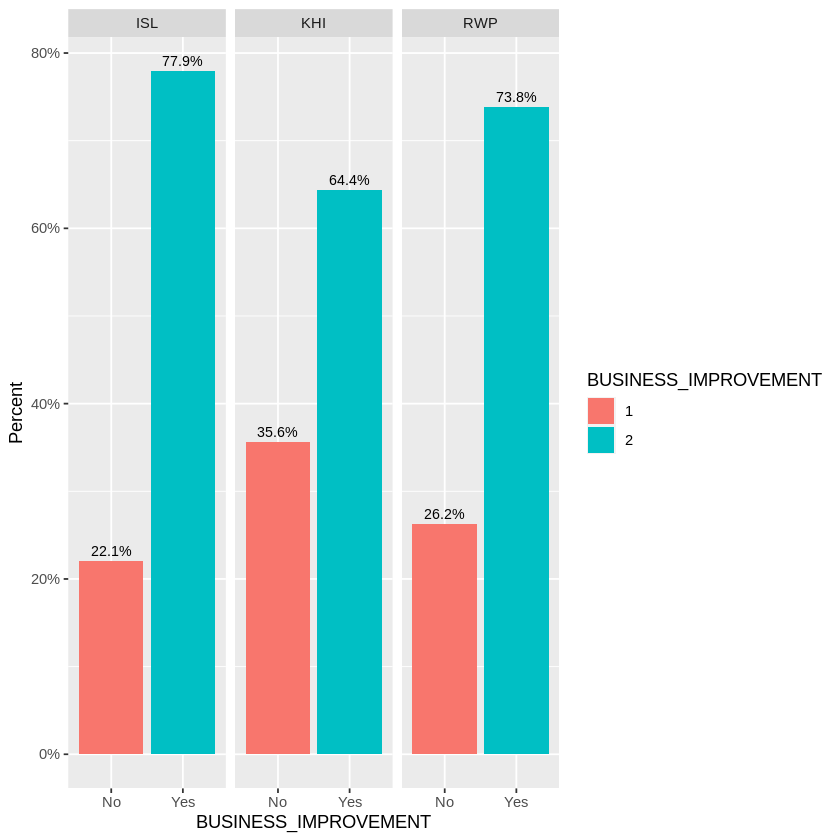

In [262]:
g107 <- ggplot(df_single_5, aes(x= BUSINESS_IMPROVEMENT,  group=ORG_CITY_CLEAN)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5, size=3) +
    labs(y = "Percent", fill="BUSINESS_IMPROVEMENT") +
    facet_grid(~ORG_CITY_CLEAN) +
    scale_y_continuous(labels = scales::percent)

g107

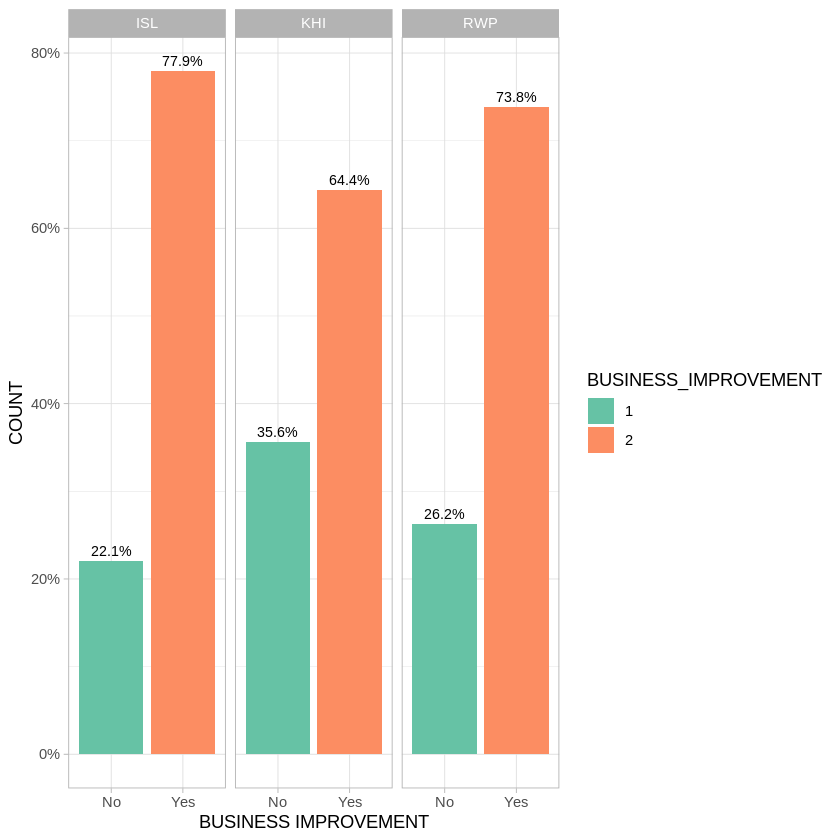

In [263]:
# bars are too little to add data labels
# Issue in Register Reconciliation
g107 <- g107 + labs(x = "BUSINESS IMPROVEMENT", y = "COUNT")
g107 <- g107 + scale_fill_brewer(palette = "Set2") 
g107 <- g107 + theme_light()
#g106 <- g107 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g107

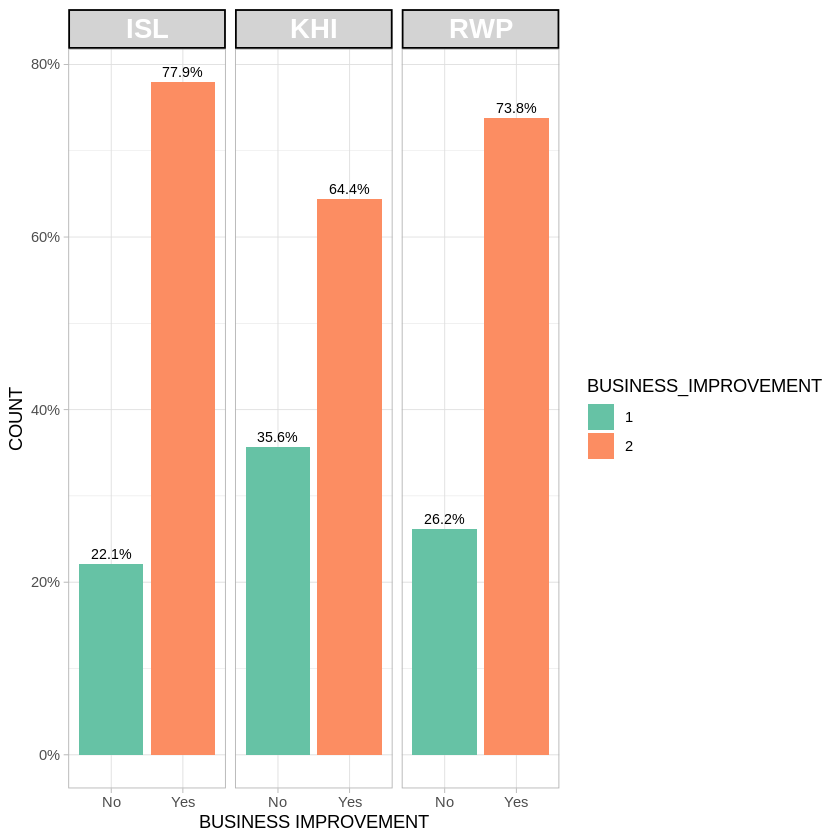

In [264]:
g107 <- g107 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1)
  )

g107

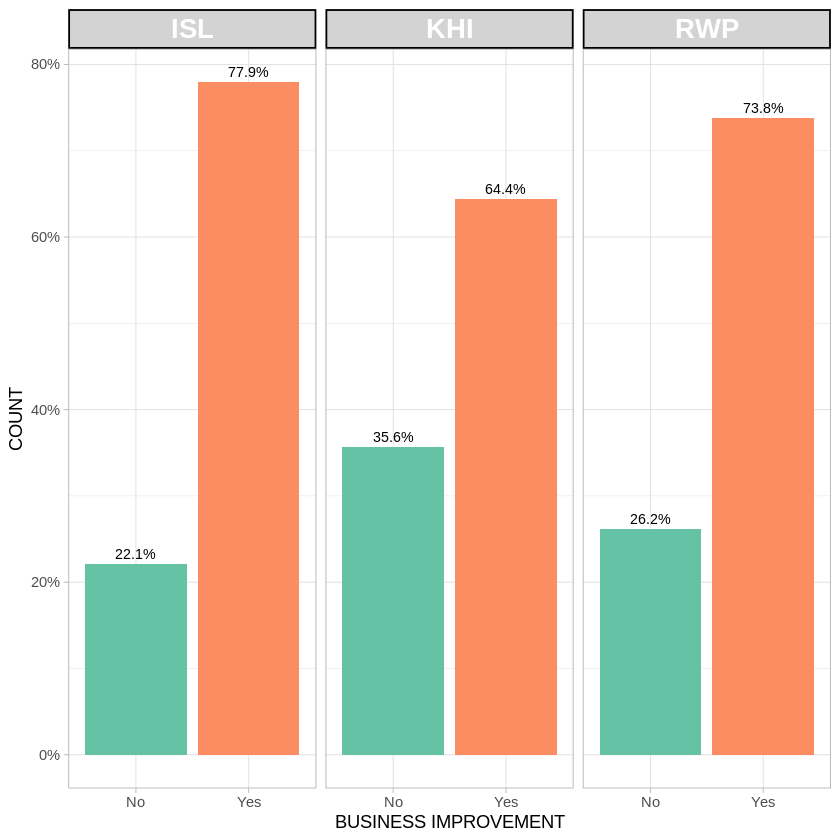

In [265]:
# removing legend
g107 <- g107 + theme(legend.position = "none")
g107

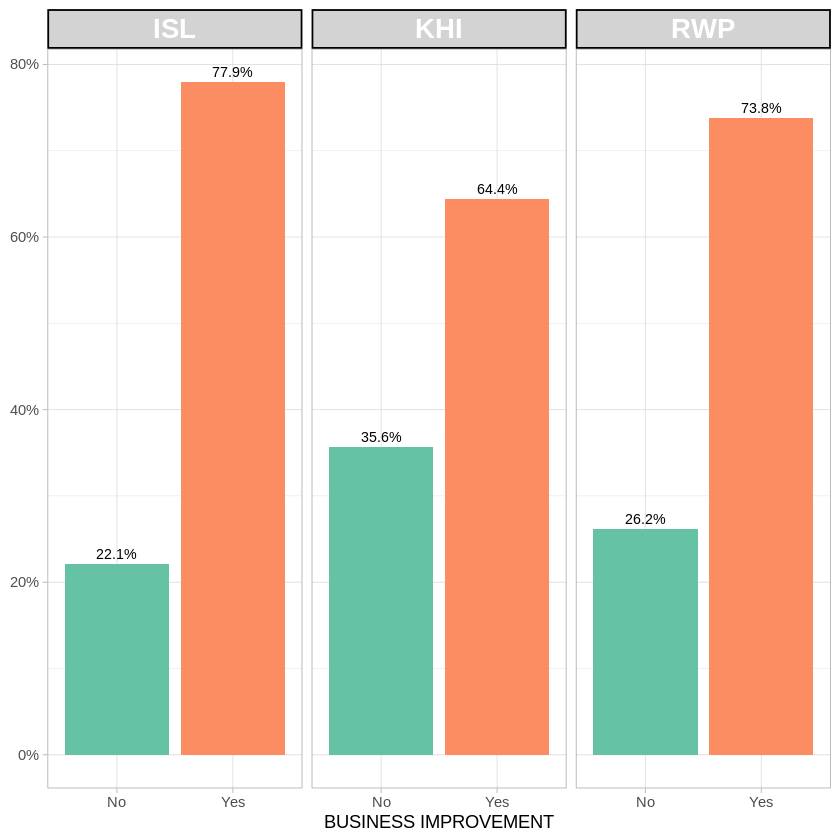

In [266]:
g107 + theme(axis.title.y = element_blank())

Graph 18

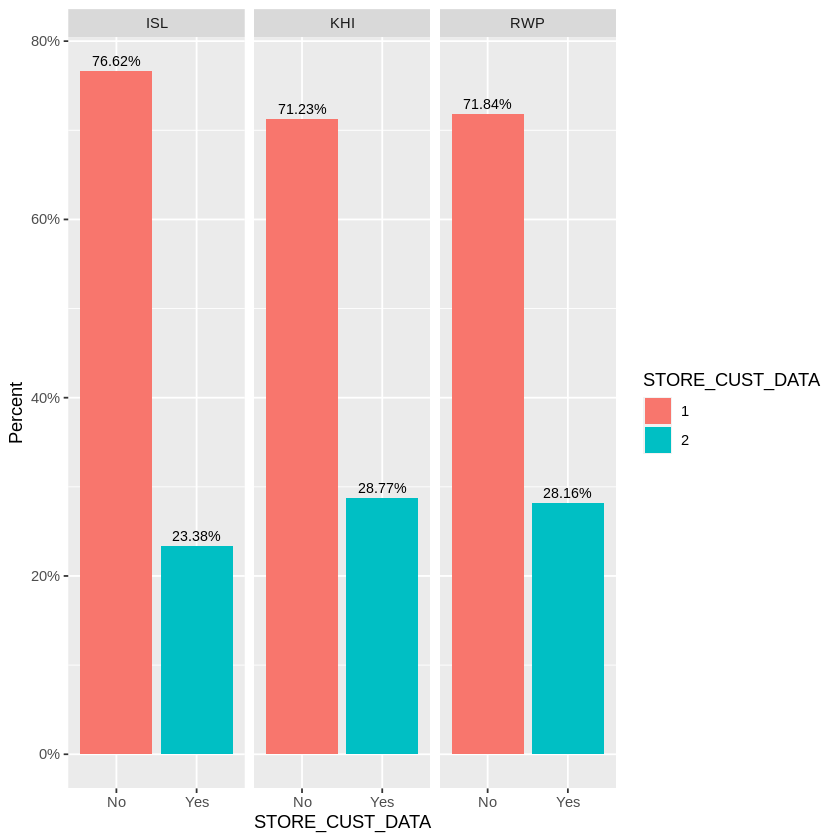

In [267]:
g108 <- ggplot(df_single_5, aes(x= STORE_CUST_DATA,  group=ORG_CITY_CLEAN)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5, size=3) +
    labs(y = "Percent", fill="STORE_CUST_DATA") +
    facet_grid(~ORG_CITY_CLEAN) +
    scale_y_continuous(labels = scales::percent)

g108

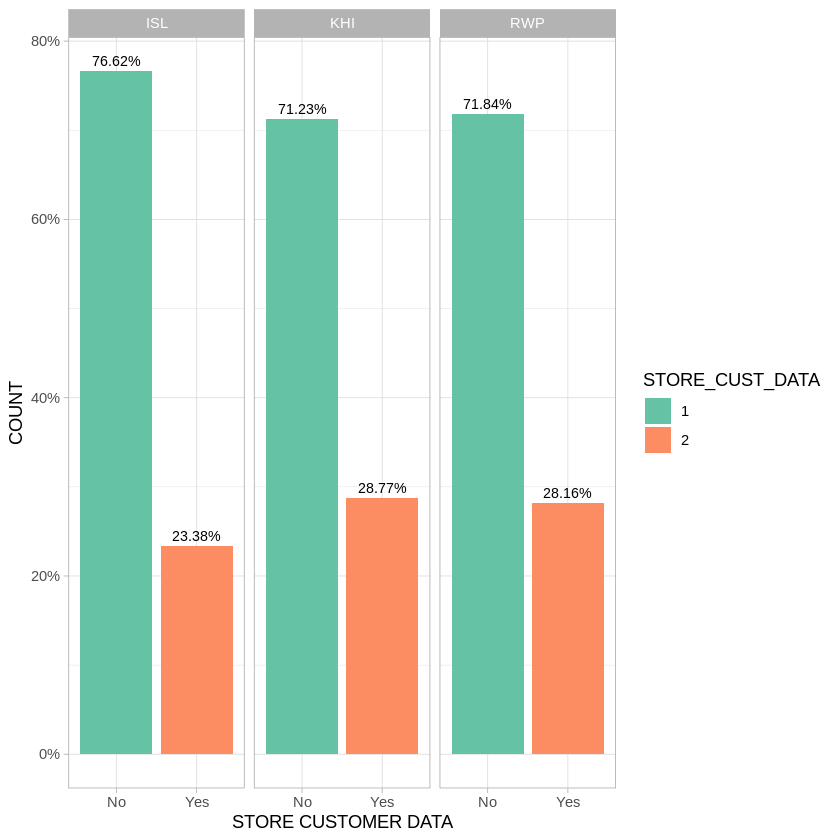

In [268]:
# bars are too little to add data labels
# Issue in Register Reconciliation
g108 <- g108 + labs(x = "STORE CUSTOMER DATA", y = "COUNT")
g108 <- g108 + scale_fill_brewer(palette = "Set2") 
g108 <- g108 + theme_light()
#g106 <- g107 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g108

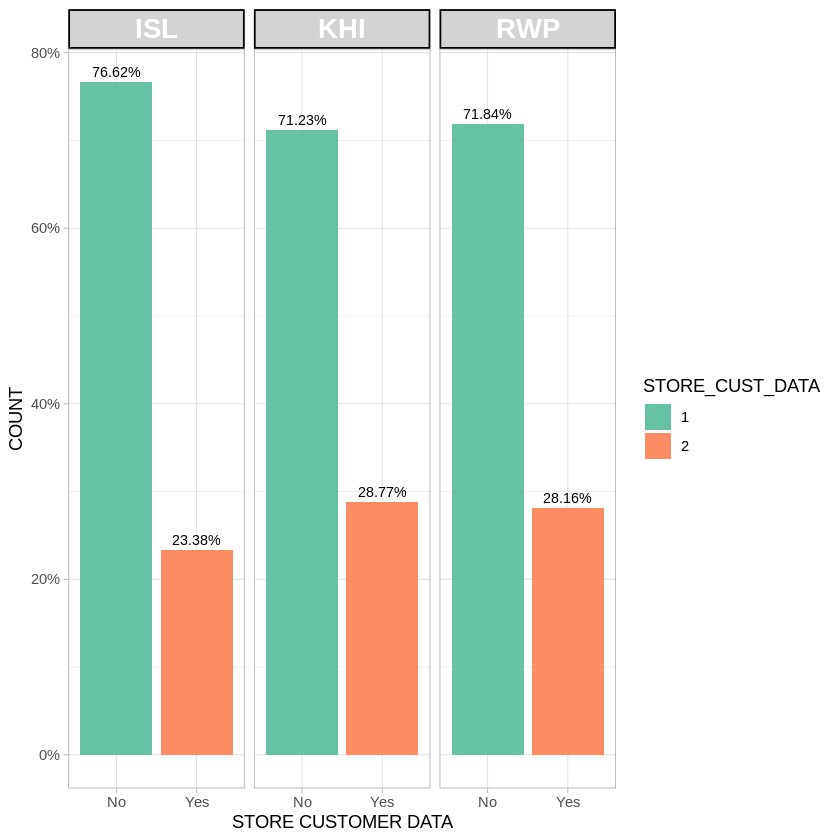

In [269]:
g108 <- g108 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1)
  )

g108

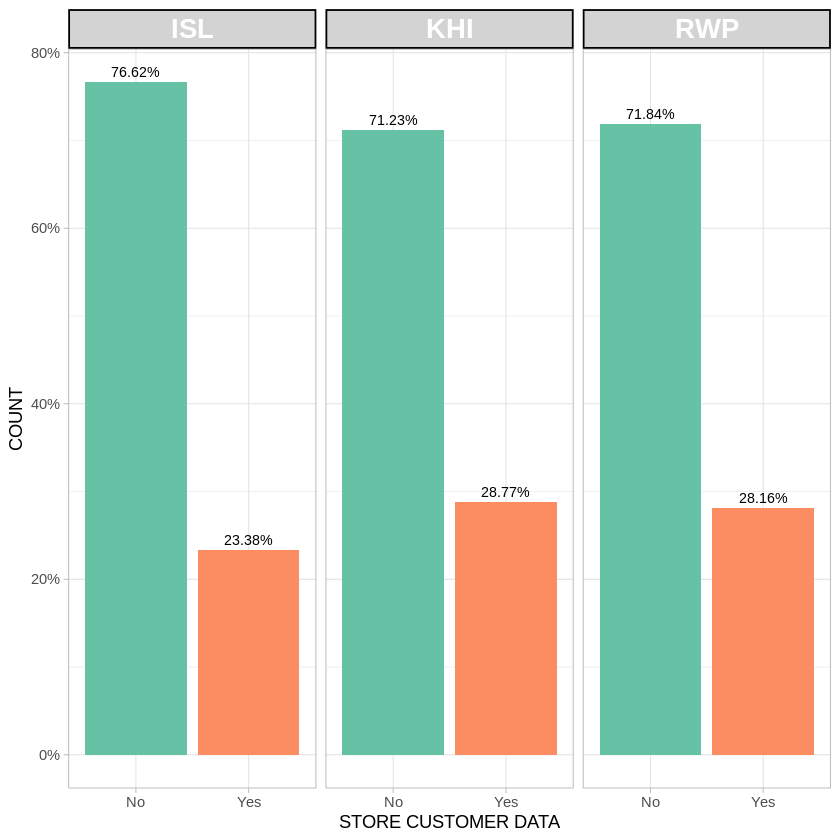

In [270]:
# removing legend
g108 <- g108 + theme(legend.position = "none")
g108

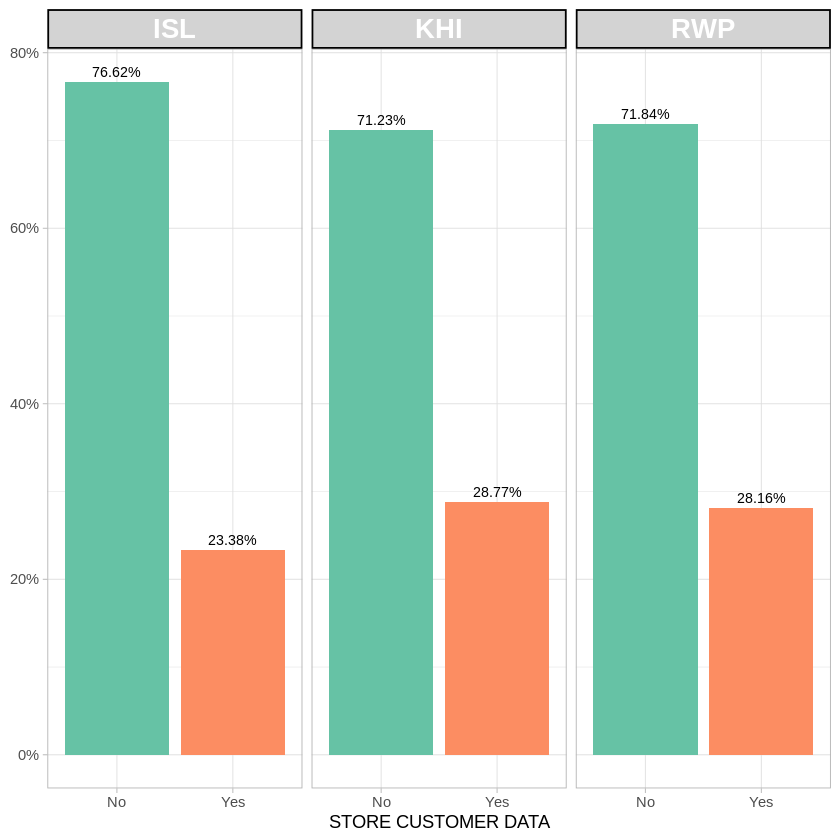

In [271]:
g108 + theme(axis.title.y = element_blank())

Graph 19

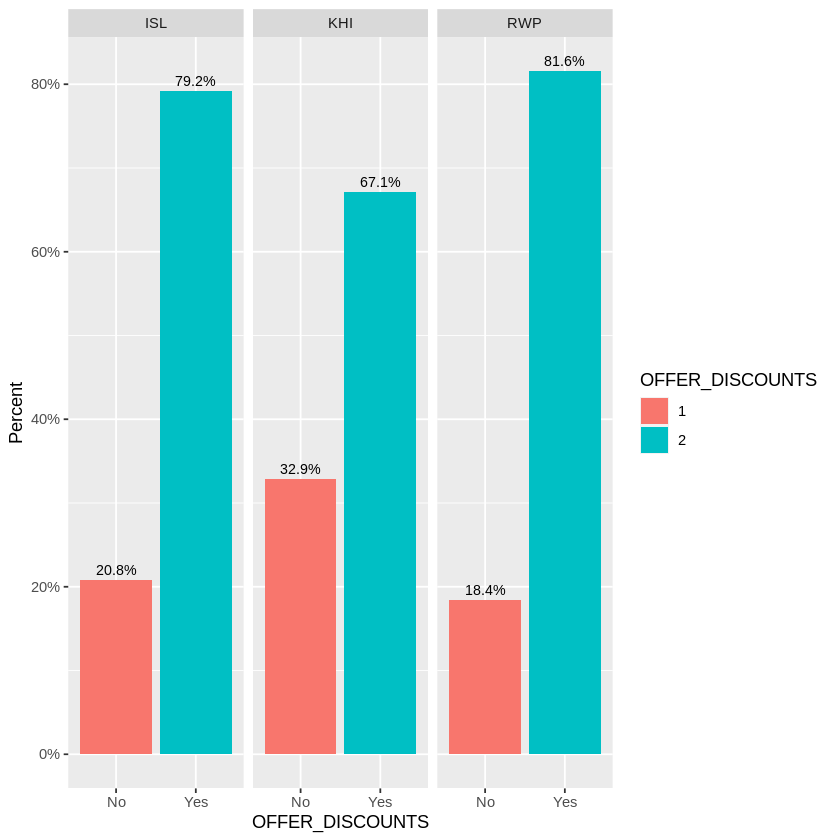

In [272]:
g109 <- ggplot(df_single_5, aes(x= OFFER_DISCOUNTS,  group=ORG_CITY_CLEAN)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5, size=3) +
    labs(y = "Percent", fill="OFFER_DISCOUNTS") +
    facet_grid(~ORG_CITY_CLEAN) +
    scale_y_continuous(labels = scales::percent)

g109

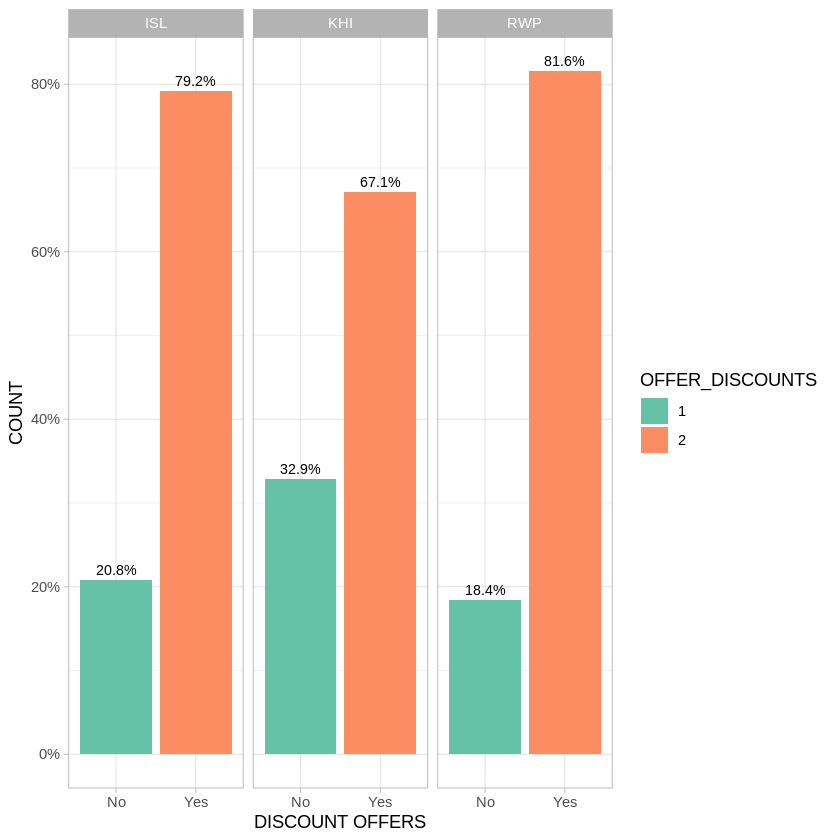

In [273]:
# bars are too little to add data labels
# Issue in Register Reconciliation
g109 <- g109 + labs(x = "DISCOUNT OFFERS", y = "COUNT")
g109 <- g109 + scale_fill_brewer(palette = "Set2") 
g109 <- g109 + theme_light()
#g106 <- g107 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g109

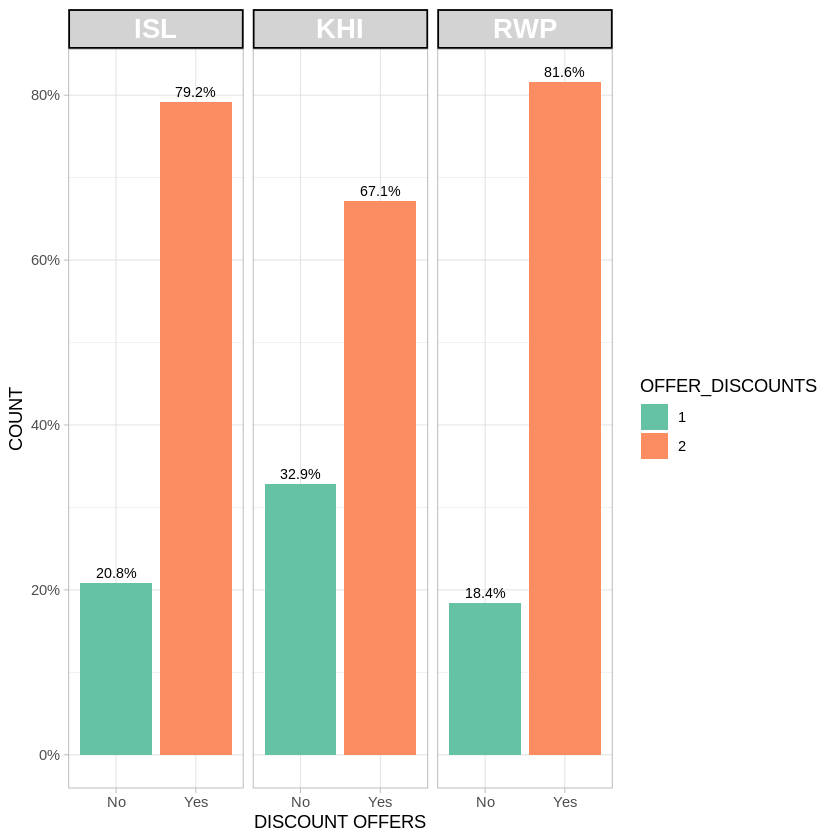

In [274]:
g109 <- g109 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1)
  )

g109

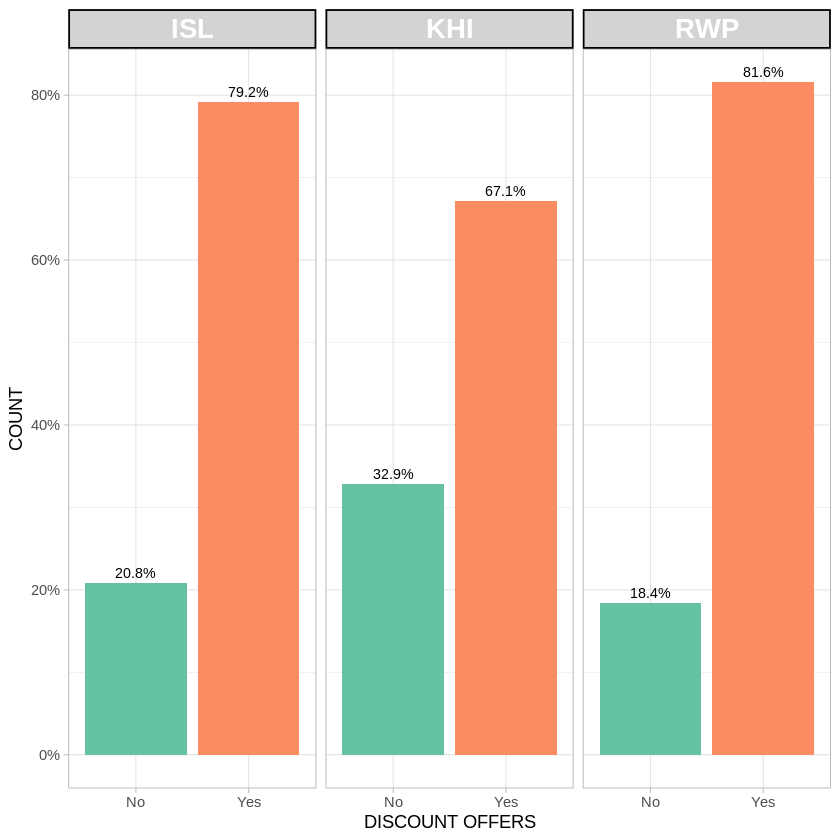

In [275]:
# removing legend
g109 <- g109 + theme(legend.position = "none")
g109

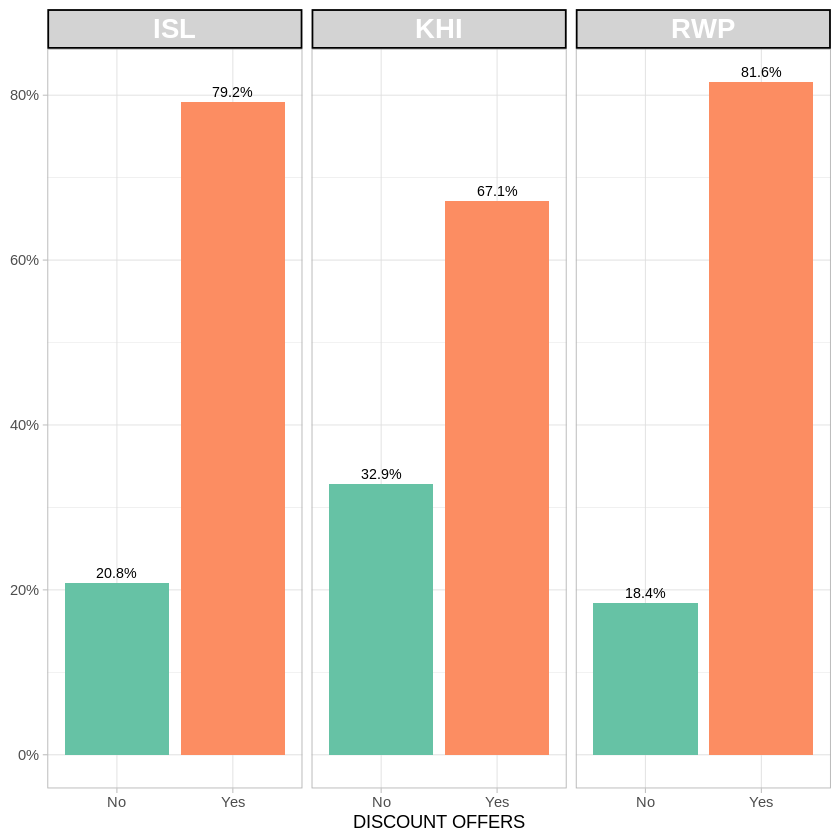

In [276]:
g109 + theme(axis.title.y = element_blank())

Graph 20

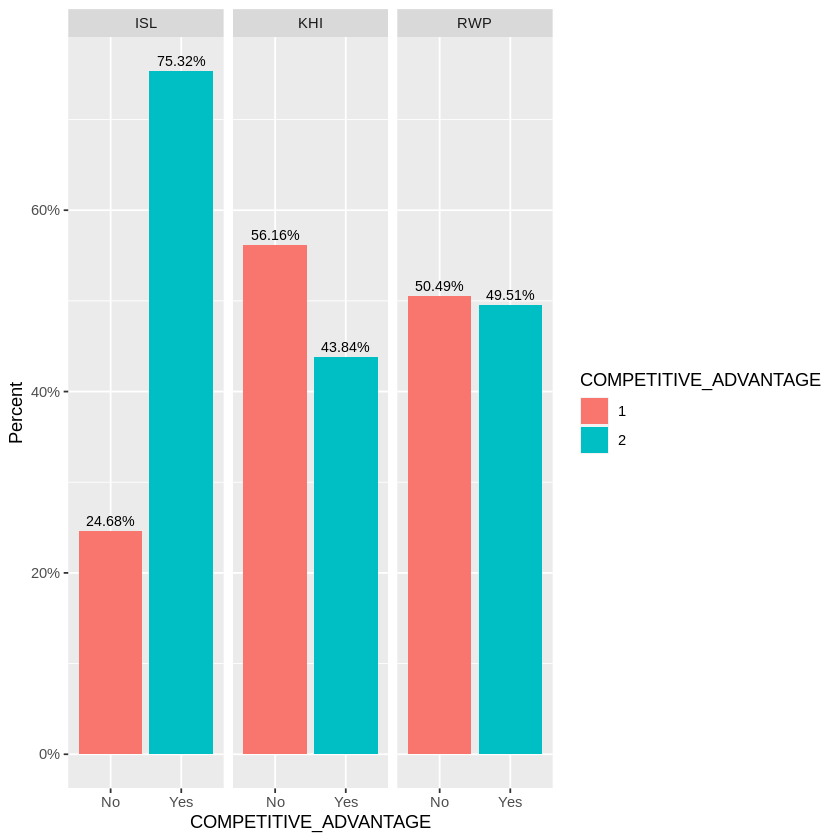

In [277]:
g120 <- ggplot(df_single_5, aes(x= COMPETITIVE_ADVANTAGE,  group=ORG_CITY_CLEAN)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5, size=3) +
    labs(y = "Percent", fill="COMPETITIVE_ADVANTAGE") +
    facet_grid(~ORG_CITY_CLEAN) +
    scale_y_continuous(labels = scales::percent)

g120

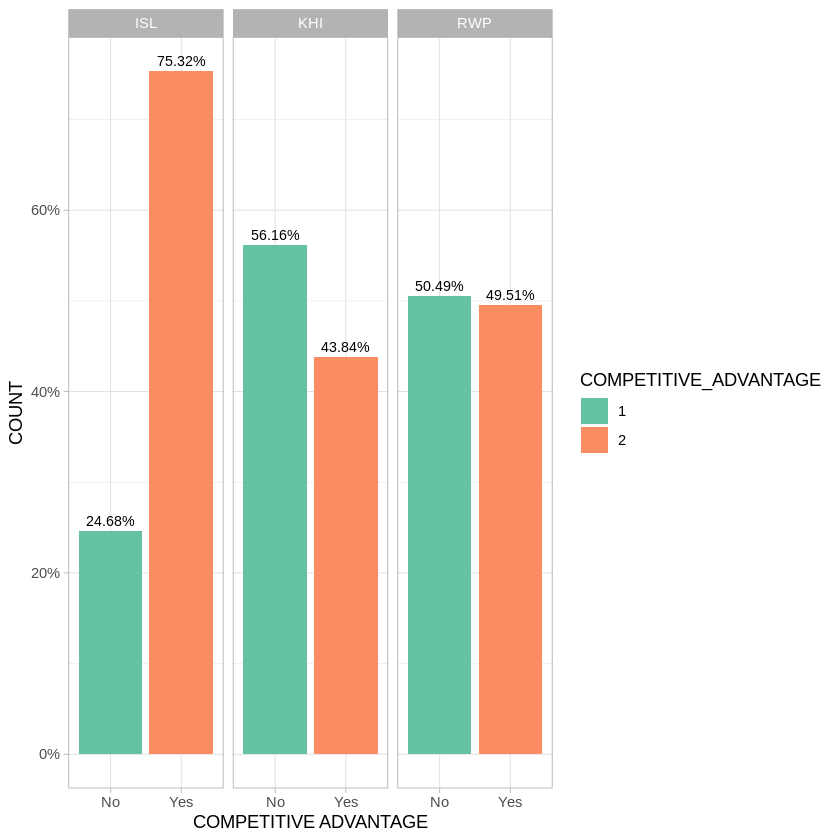

In [278]:
# bars are too little to add data labels
# Issue in Register Reconciliation
g120 <- g120 + labs(x = "COMPETITIVE ADVANTAGE", y = "COUNT")
g120 <- g120 + scale_fill_brewer(palette = "Set2") 
g120 <- g120 + theme_light()
#g106 <- g107 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g120

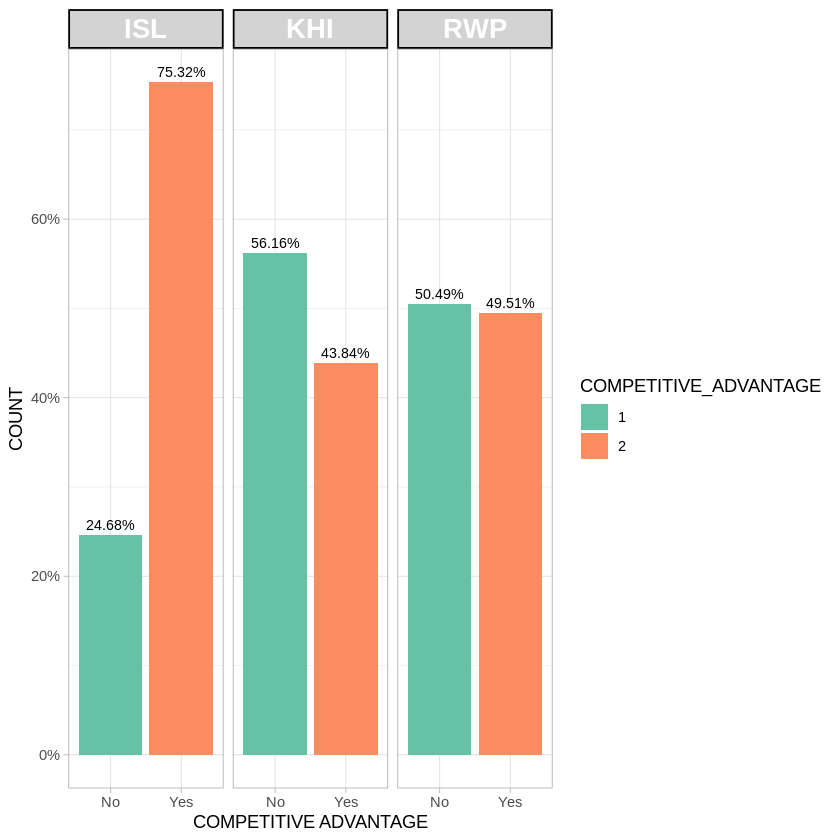

In [279]:
g120 <- g120 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1)
  )

g120

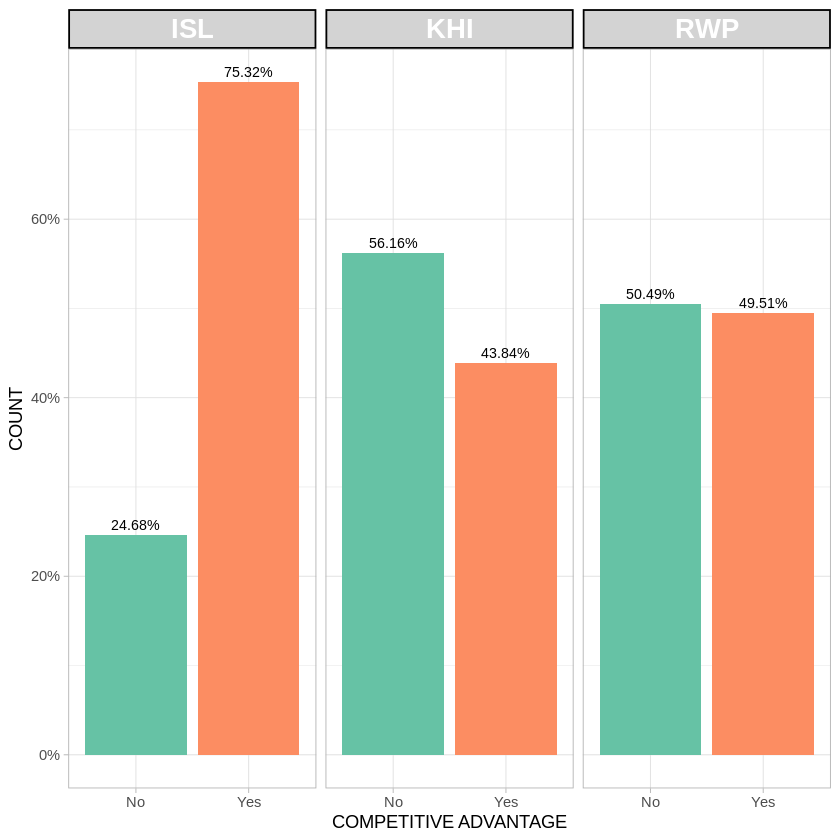

In [280]:
# removing legend
g120 <- g120 + theme(legend.position = "none")
g120

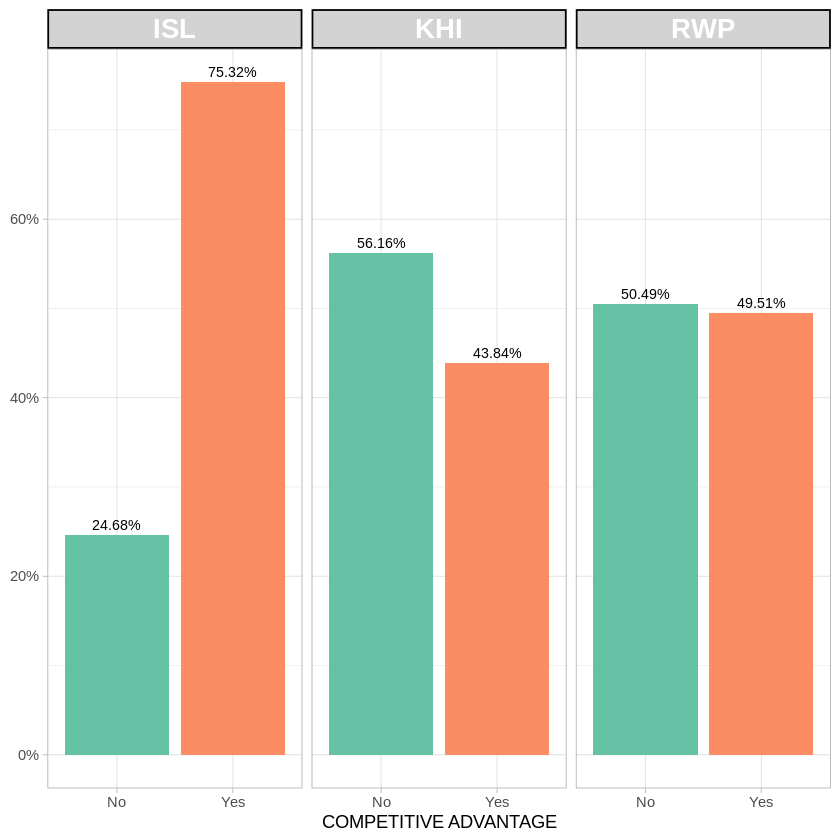

In [281]:
g120 + theme(axis.title.y = element_blank())

Coco Jumbo

In [282]:
glimpse(df_single_5)

Rows: 253
Columns: 23
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 36750, 35918, 36750…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Na)", "(Mo…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "Yes", "No", "Yes", "No", "No…
$ INTERNET_PROVIDER     <chr> 

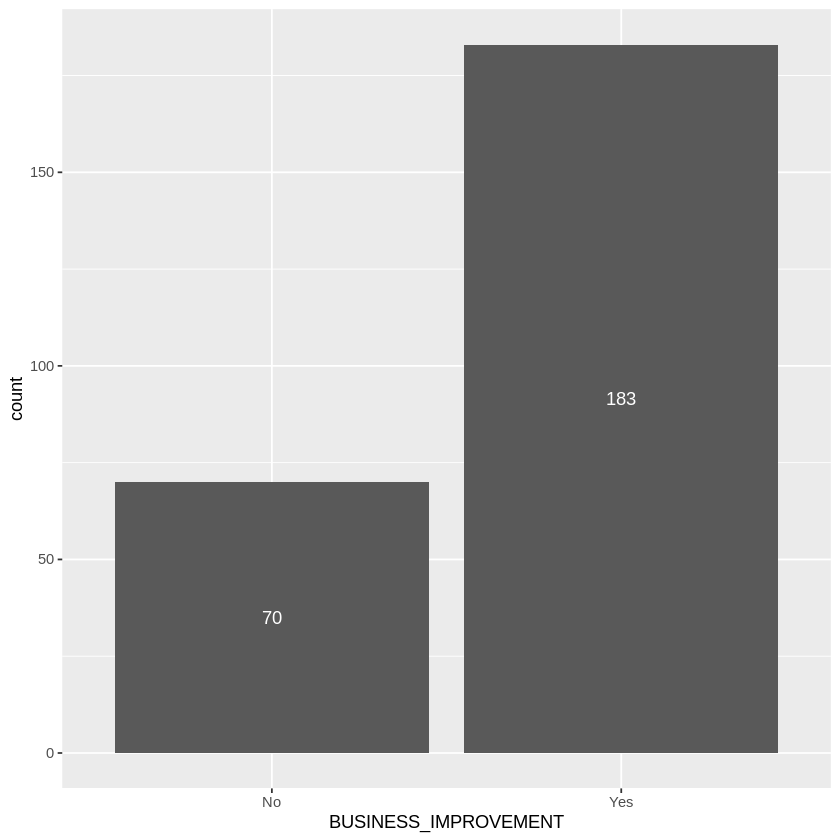

In [283]:
g10 <- df_single_5 %>%
  ggplot(aes(x = BUSINESS_IMPROVEMENT)) + 
  geom_bar()

p.labs <- g10 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

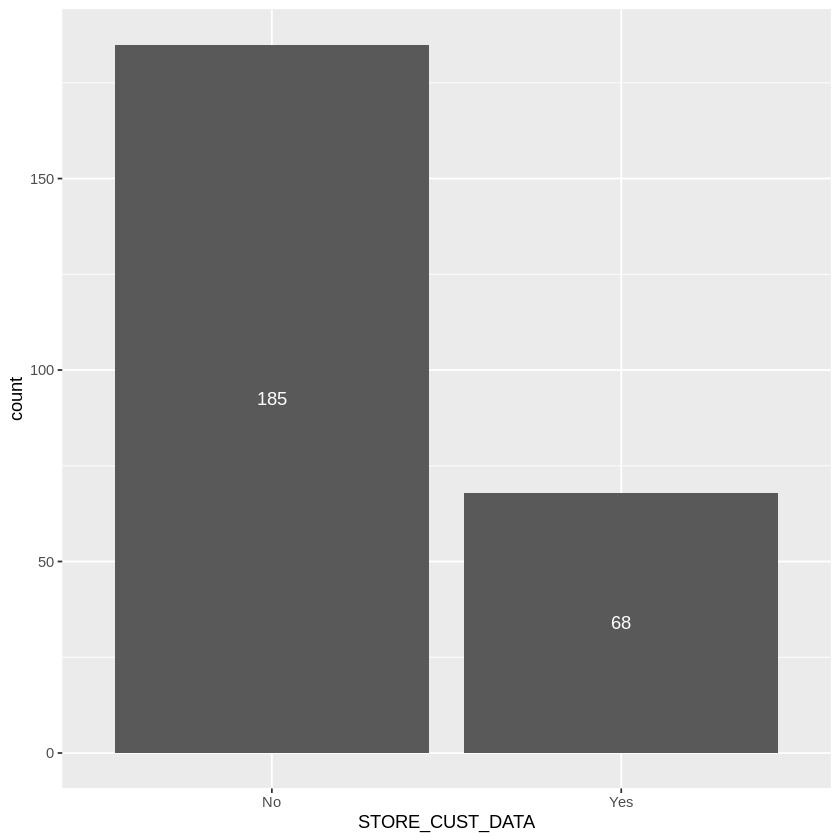

In [284]:
g10 <- df_single_5 %>%
  ggplot(aes(x = STORE_CUST_DATA)) + 
  geom_bar()

p.labs <- g10 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

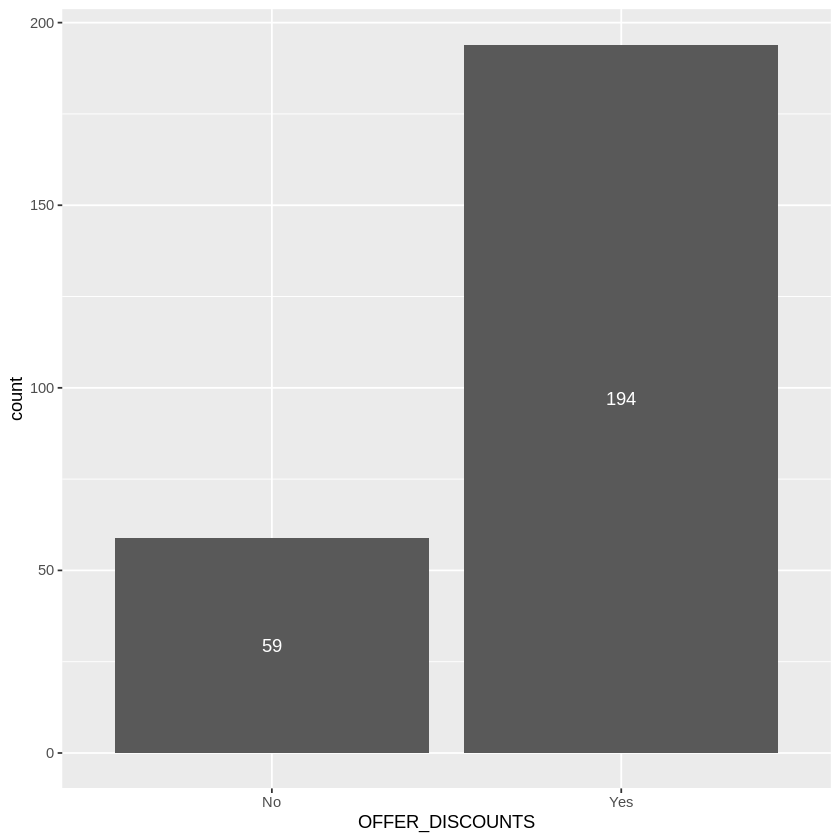

In [285]:
g10 <- df_single_5 %>%
  ggplot(aes(x = OFFER_DISCOUNTS)) + 
  geom_bar()

p.labs <- g10 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

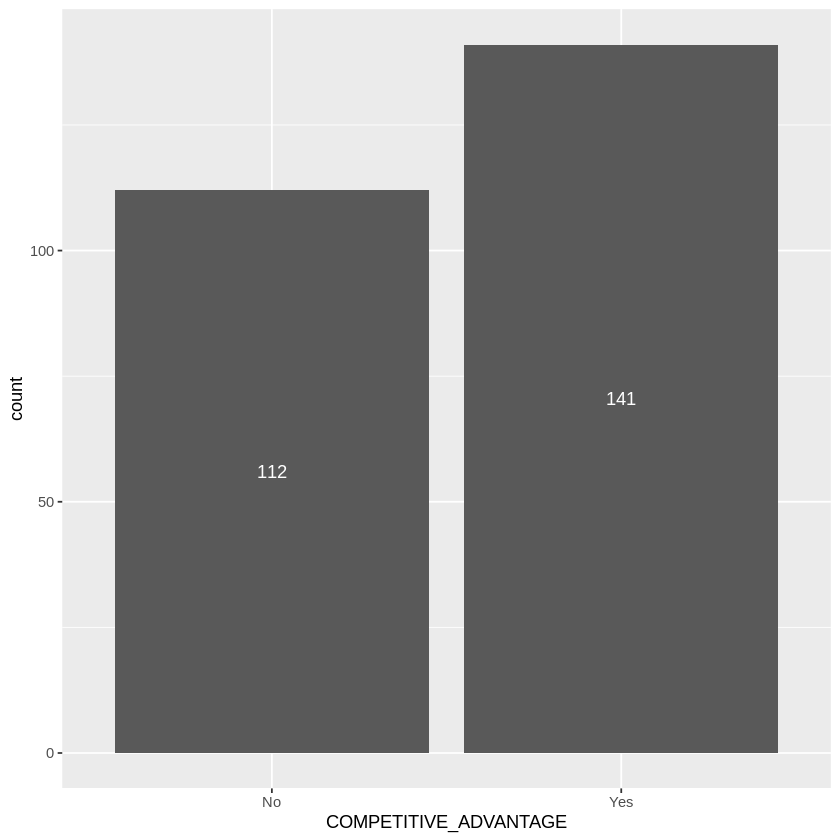

In [286]:
g10 <- df_single_5 %>%
  ggplot(aes(x = COMPETITIVE_ADVANTAGE)) + 
  geom_bar()

p.labs <- g10 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

Graph 100

In [288]:
colnames(df_single_5)

[1] "EMP_CODE"              "ORG_NAME"              "ORG_CITY"             
 [4] "EMP_PER_OUTLET"        "ORG_TYPE"              "EXPANSION"            
 [7] "RECONCILIATION"        "WHY_NO_POS"            "LANGUAGE_PREF"        
[10] "PAYMENT_PREF"          "PAYMENT_AMOUNT"        "INTERNET_ACCESS"      
[13] "INTERNET_PROVIDER"     "INTERNET_DISRUPTION"   "DEPLOYMENT_PREF"      
[16] "BUSINESS_IMPROVEMENT"  "STORE_CUST_DATA"       "OFFER_DISCOUNTS"      
[19] "COMPETITIVE_ADVANTAGE" "ORG_CITY_CLEAN"        "ORG_SIZE"             
[22] "ORG_REGION"            "LANGUAGE_PREF_RECODE"

In [289]:
#install.packages("ggwordcloud")
library(ggwordcloud)

Warning message:
“Removed 7 rows containing missing values (geom_text_wordcloud).”


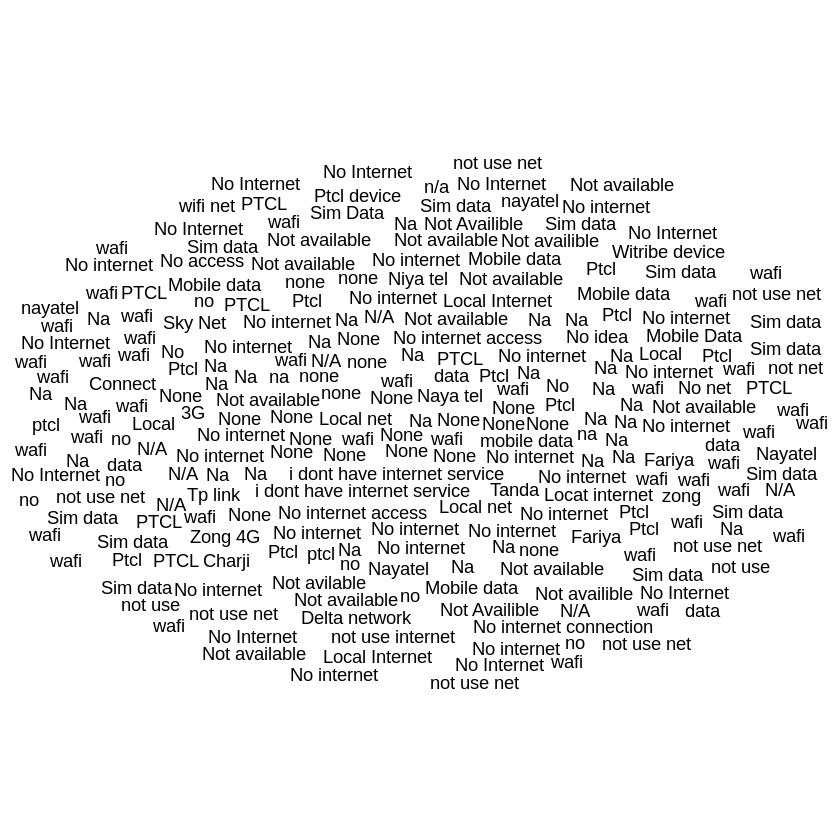

In [290]:
ggplot(df_single_5, aes(label = INTERNET_PROVIDER)) +
  geom_text_wordcloud() +
  theme_minimal()

In [291]:
df_INTERNET = data.frame(table(unlist(strsplit(tolower(df_single_5$INTERNET_PROVIDER), " "))))

In [292]:
colnames(df_INTERNET)

[1] "Var1" "Freq"

In [293]:
nrow(df_INTERNET)

[1] 44

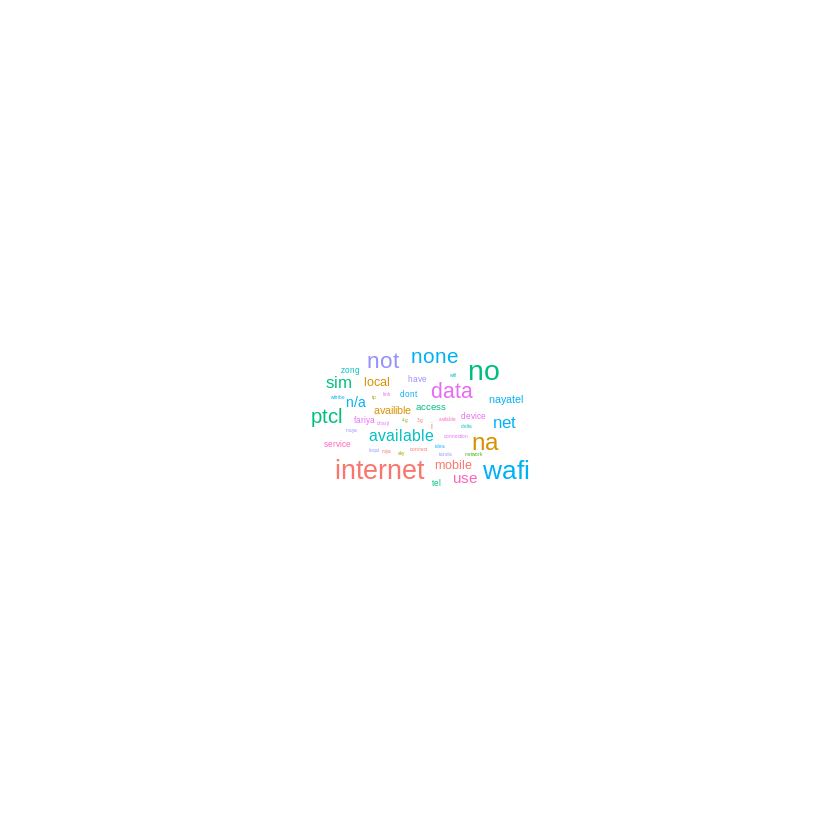

In [294]:
ggplot(df_INTERNET, aes(label = Var1, size = Freq,
    color = factor(sample.int(10, nrow(df_INTERNET), replace = TRUE)),)) +
  geom_text_wordcloud() +
  #scale_radius(range = c(0, 20), limits = c(0, NA)) +
  theme_minimal()

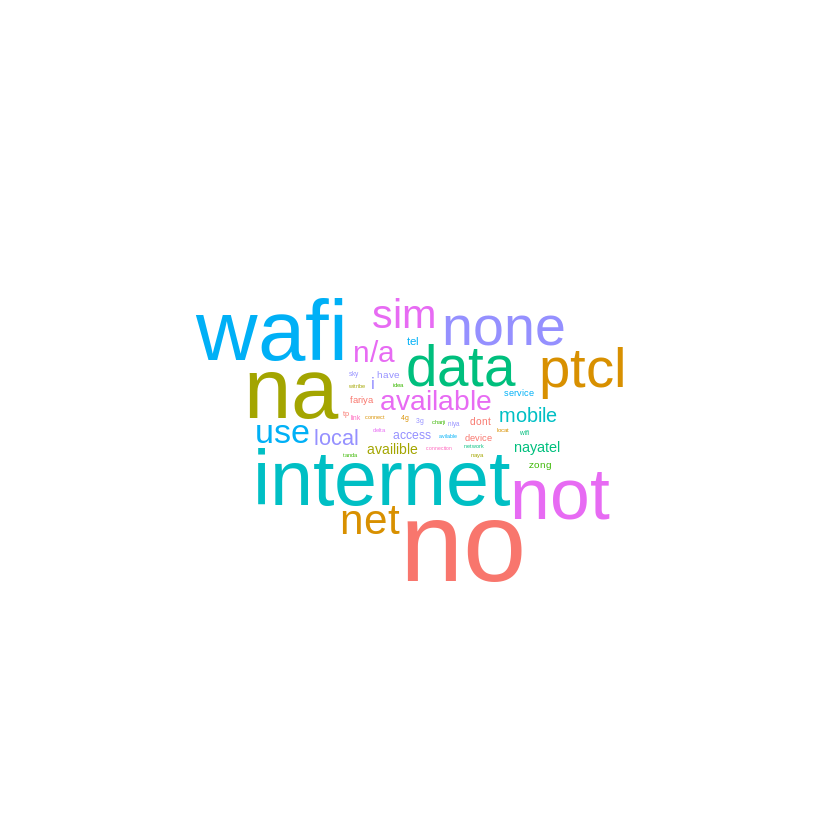

In [295]:
ggplot(df_INTERNET, aes(label = Var1, size = Freq,
    color = factor(sample.int(10, nrow(df_INTERNET), replace = TRUE)),)) +
  geom_text_wordcloud_area() +
  scale_size_area(max_size = 24) +
  theme_minimal()
  
  #geom_text_wordcloud() +
  #scale_radius(range = c(0, 20), limits = c(0, NA)) +
  #theme_minimal()

Graph 100

In [301]:
df_NO_POS = data.frame(table(unlist(strsplit(tolower(df_single_5$WHY_NO_POS), ","))))

In [303]:
colnames(df_NO_POS)

[1] "Var1" "Freq"

In [302]:
#df_single_5 %>%
#  group_by(ORG_CITY_CLEAN) %%
#  mutate(NO_POS_COUNT = table(unlist(strsplit(tolower(df_single_5$WHY_NO_POS), ","))))

In [315]:
t4 <- df_NO_POS %>%
  tabyl(Var1) %>%
  #adorn_percentages("row") %>%
  adorn_pct_formatting(affix_sign = FALSE) #%>% # if you do not want percentage sign, affix_sign = FALSE
  #mutate(PERCENTAGE = as.numeric(percent),
  #       LABEL = paste(round(PERCENTAGE,2), "%", sep=""),
  #       C_LABEL = paste("(",n,")",sep="")) %>%
  #arrange(desc(PERCENTAGE)) %>% # descending %>%
  #rename(COUNT = n) # renaming column 

In [316]:
t4

Var1,n,percent
<fct>,<dbl>,<chr>
i am happy with how my business is managed presently,1,10.0
i have reservations with technology,1,10.0
it never crossed my mind to have such a system,1,10.0
tax purposes,1,10.0
don’t want to spend money,1,10.0
i am happy with how my business is managed presently,1,10.0
i don't know,1,10.0
i have reservations with technology,1,10.0
it never crossed my mind to have such a system,1,10.0


In [320]:
df_NO_POS %>%
  count(Var1) %>%
  # count creates a column called 'n'
  mutate(percent = n / sum(n) * 100)


Var1,n,percent
<fct>,<int>,<dbl>
i am happy with how my business is managed presently,1,10
i have reservations with technology,1,10
it never crossed my mind to have such a system,1,10
tax purposes,1,10
don’t want to spend money,1,10
i am happy with how my business is managed presently,1,10
i don't know,1,10
i have reservations with technology,1,10
it never crossed my mind to have such a system,1,10


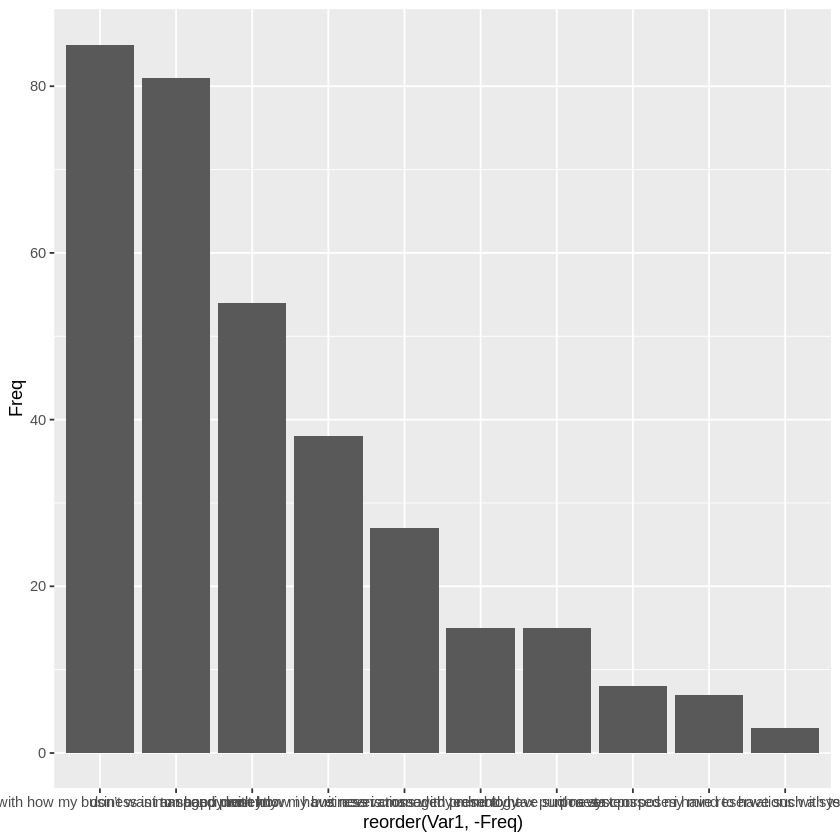

In [332]:
#ggplot(tips2, aes(x = reorder(day, -perc), y = perc)) + geom_bar(stat = "identity")


g_no <- df_NO_POS %>%
  ggplot(aes(x=reorder(Var1,-Freq),y=Freq)) + 
  geom_bar(stat="identity")

g_no

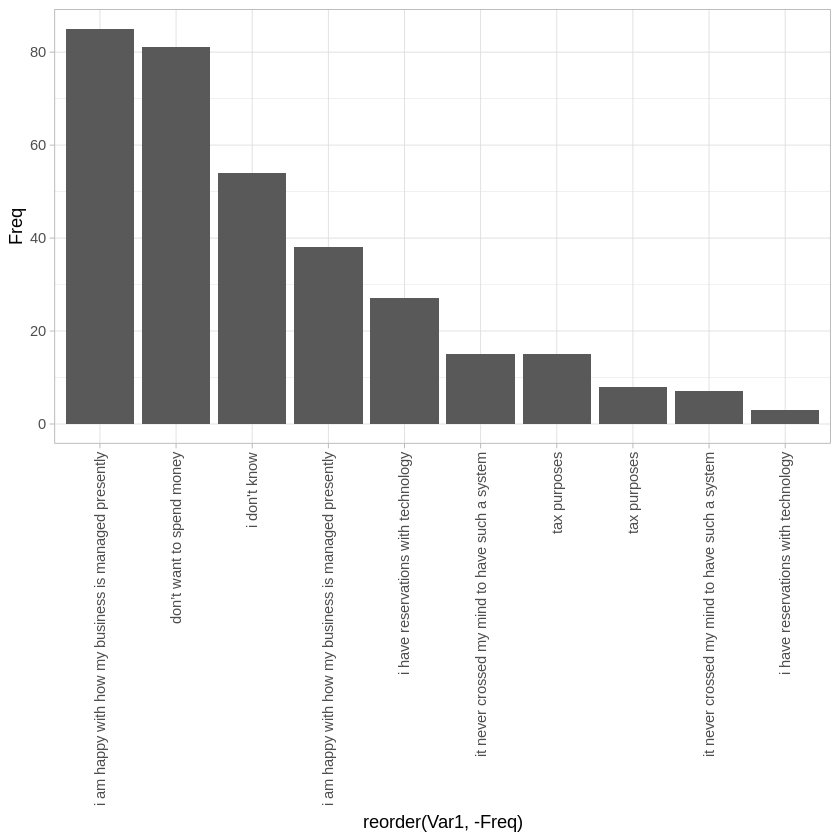

In [333]:
# bars are too little to add data labels
# Issue in Register Reconciliation
#g121 <- g_no + labs(x = "COMPETITIVE ADVANTAGE", y = "COUNT")
g121 <- g_no + scale_fill_brewer(palette = "Set2") 
g121 <- g121 + theme_light()
g121 <- g121 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g121

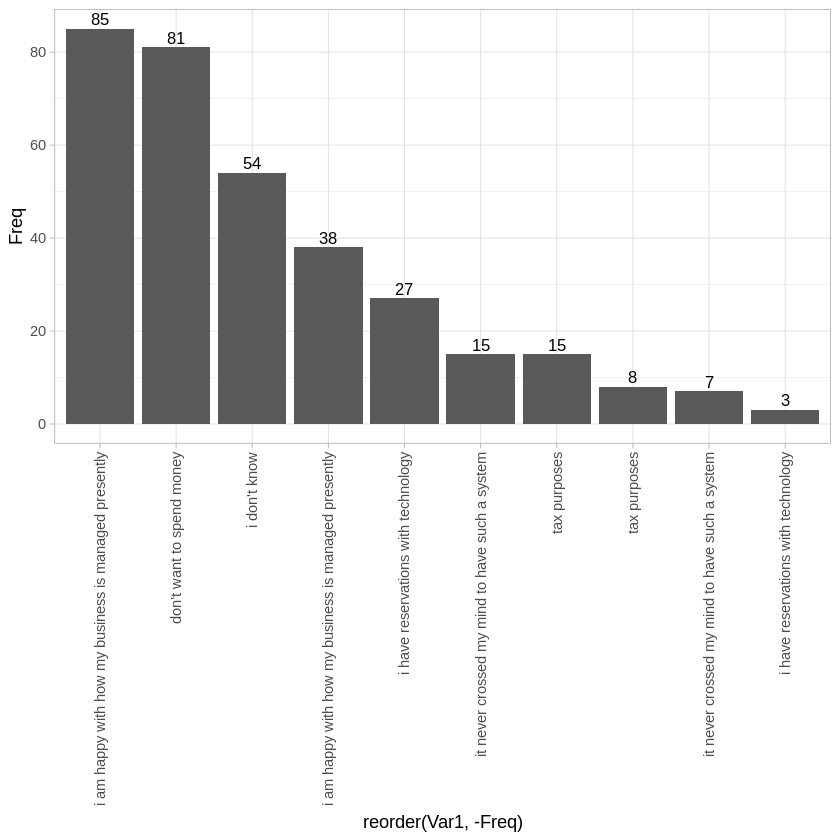

In [334]:
g121 <- g121 + geom_text(aes(label=Freq), vjust=-0.3, size=3.5)
g121

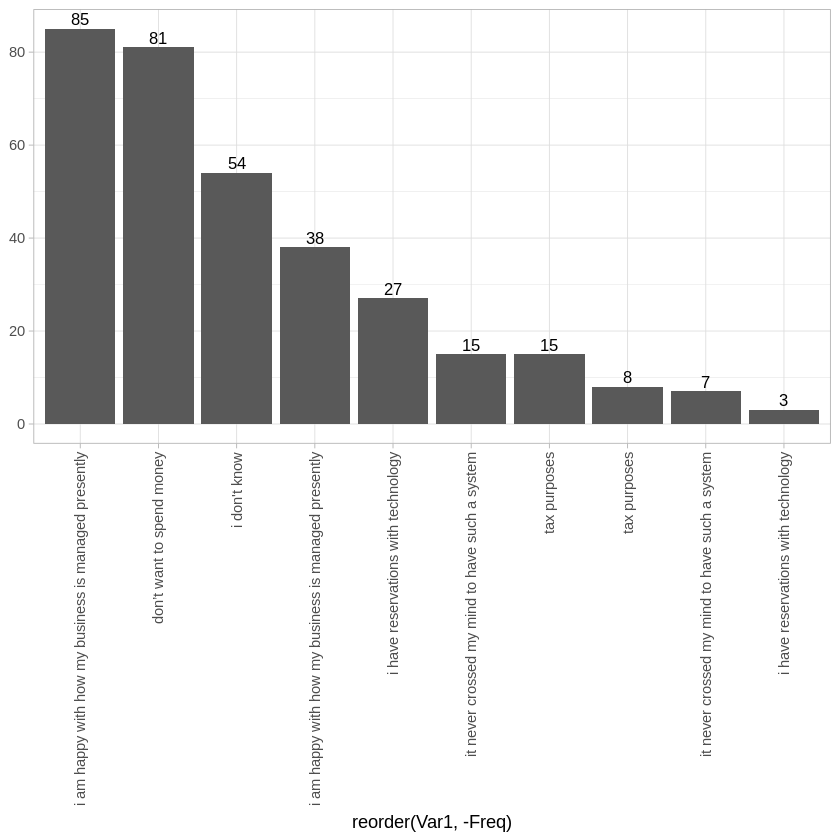

In [335]:
g121 <- g121 + theme(axis.title.y = element_blank())
g121

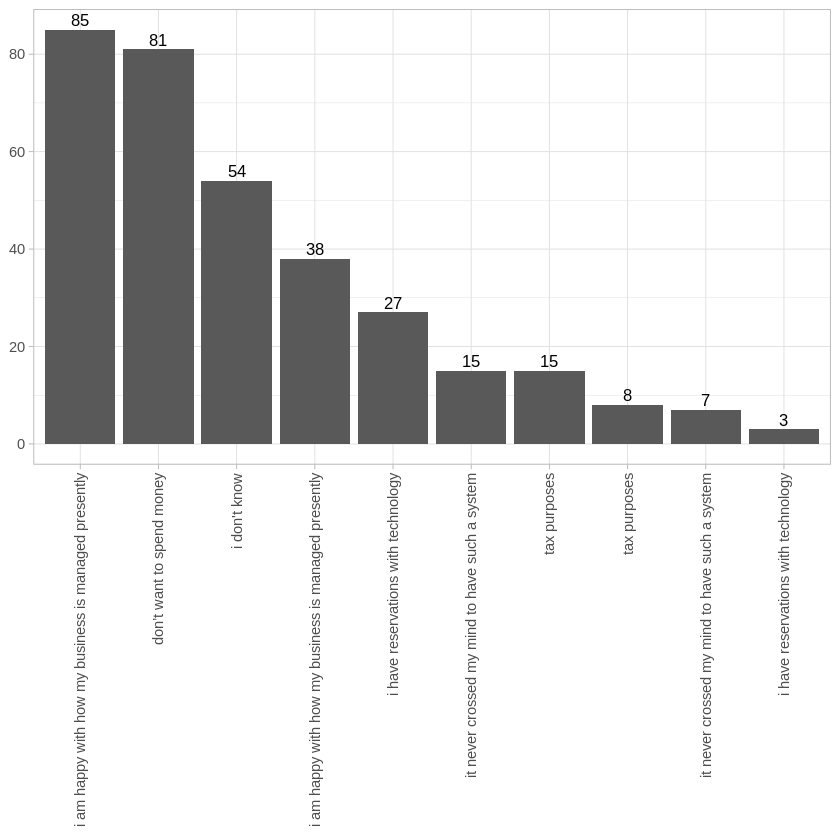

In [336]:
g121 <- g121 + theme(axis.title.x = element_blank())
g121